# House Prices.

## Loading data and library.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

C:\Users\AlvaroSanchez91\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
from xgboost.sklearn import XGBRegressor
from sklearn import cross_validation, metrics   #Additional scklearn functions
from sklearn.grid_search import GridSearchCV   #Perforing grid search

import matplotlib.pylab as plt
%matplotlib inline
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 12, 4

C:\Users\AlvaroSanchez91\Anaconda3\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [3]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectFromModel

In [4]:
data= pd.read_csv("D:\\Ciencia de Datos\\kaggle\\House Prices. Advanced regression techniques\\train.csv")
test_kaggle=pd.read_csv("D:\\Ciencia de Datos\\kaggle\\House Prices. Advanced regression techniques\\test.csv")
Id_test_kaggle=test_kaggle['Id']

In [5]:
print(data.shape)
print(test_kaggle.shape)

(1460, 81)
(1459, 80)


In [6]:
data.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities    ...     PoolArea PoolQC Fence MiscFeature MiscVal  \
0         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
1         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
2         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
3         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   
4         Lvl    AllPub    ...            0    NaN   NaN         NaN       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD         Normal     208500  
1      5   2007        WD         Normal     181500  
2      9   2008        WD         Normal     223500  
3      2   2006        WD        Abnorml     140000  
4     12   2008        WD         Normal     250000  

[5 rows x 81 columns]

## Exploring variables. 

Id
Id  have  0  NaNs


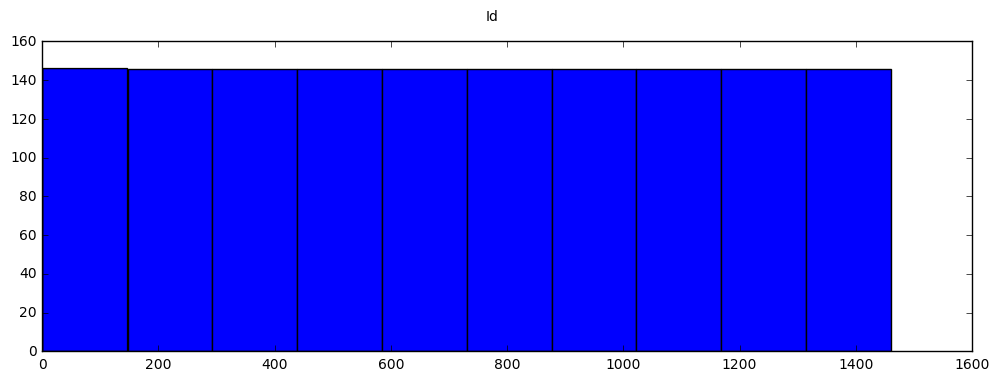

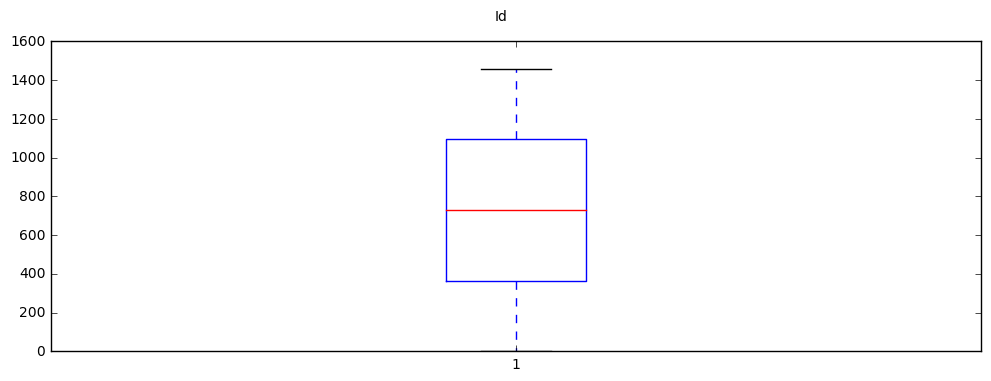

MSSubClass
MSSubClass  have  0  NaNs


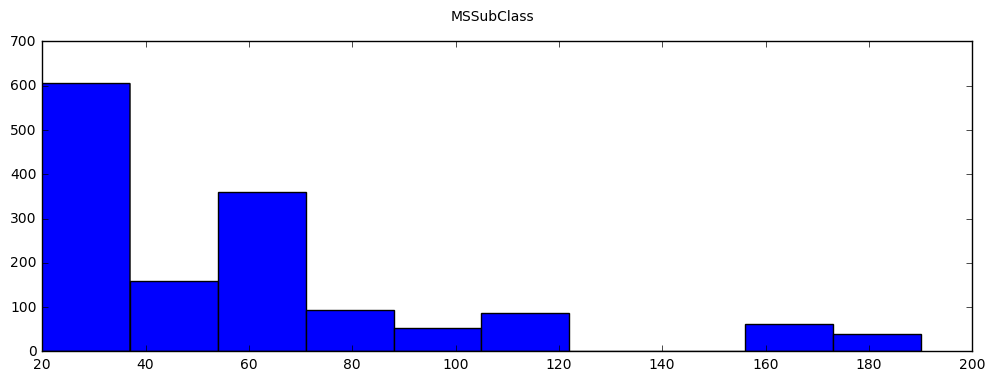

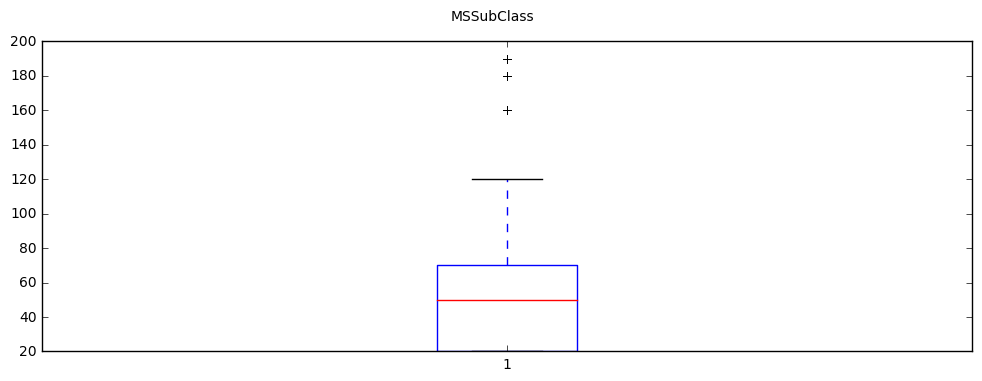

MSZoning
MSZoning  have  0  NaNs
LotFrontage
LotFrontage  have  259  NaNs


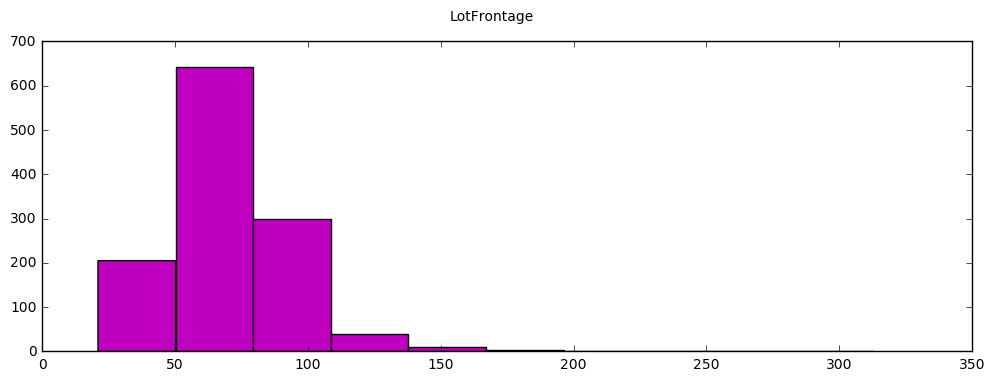

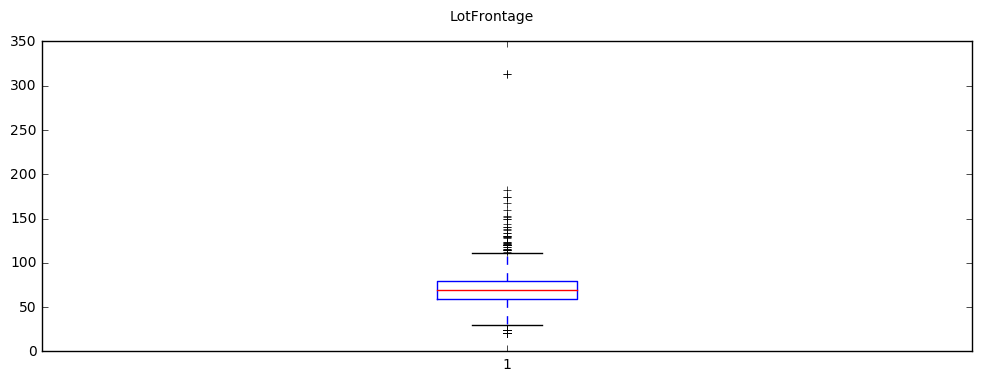

LotArea
LotArea  have  0  NaNs


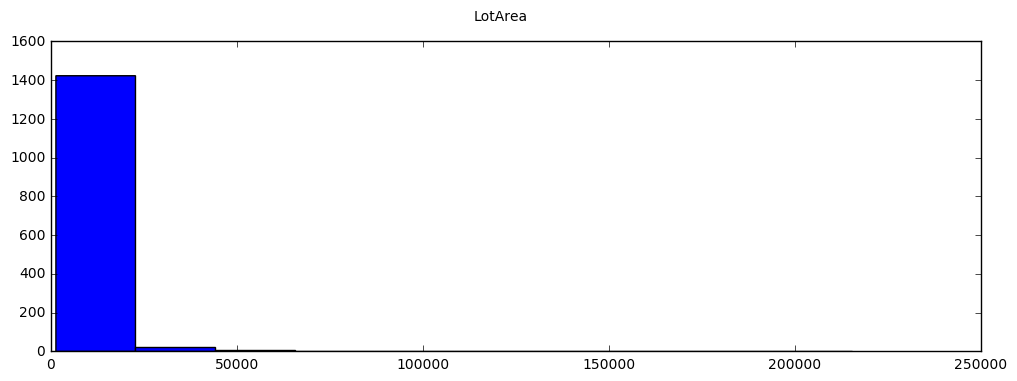

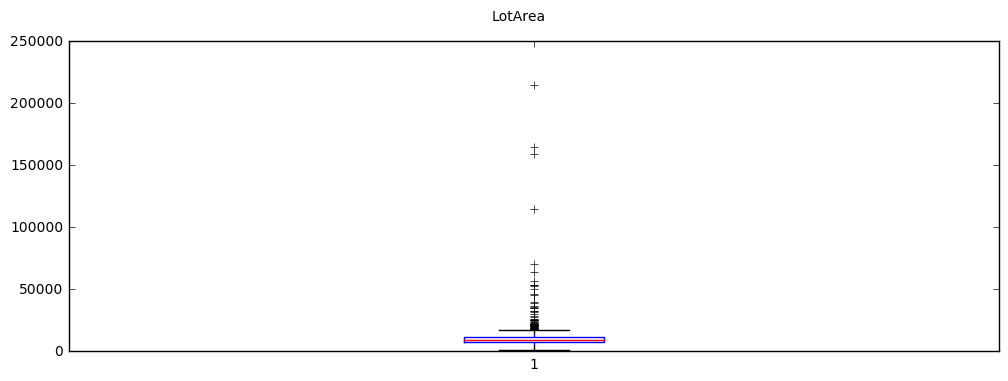

Street
Street  have  0  NaNs
Alley
Alley  have  1369  NaNs
LotShape
LotShape  have  0  NaNs
LandContour
LandContour  have  0  NaNs
Utilities
Utilities  have  0  NaNs
LotConfig
LotConfig  have  0  NaNs
LandSlope
LandSlope  have  0  NaNs
Neighborhood
Neighborhood  have  0  NaNs
Condition1
Condition1  have  0  NaNs
Condition2
Condition2  have  0  NaNs
BldgType
BldgType  have  0  NaNs
HouseStyle
HouseStyle  have  0  NaNs
OverallQual
OverallQual  have  0  NaNs


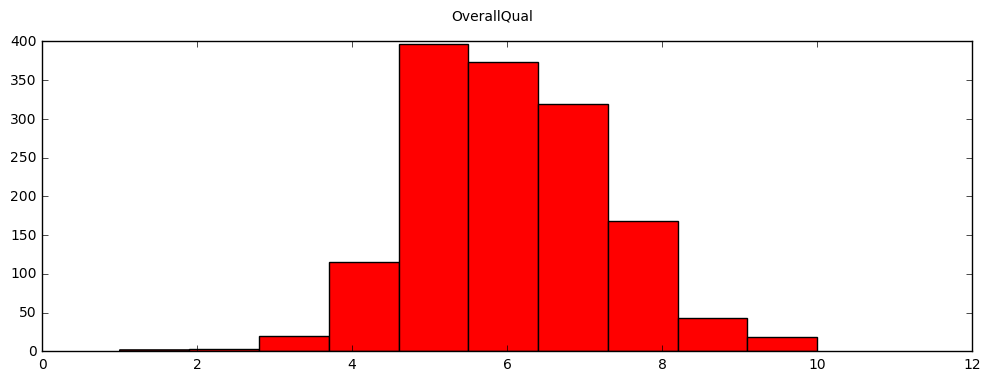

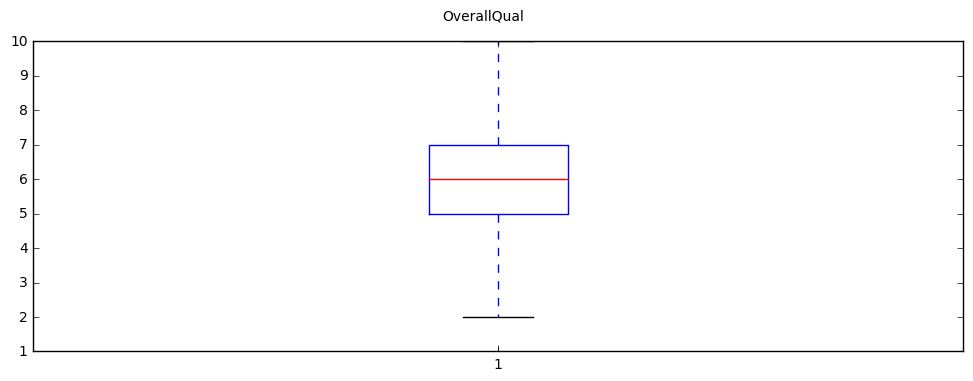

OverallCond
OverallCond  have  0  NaNs


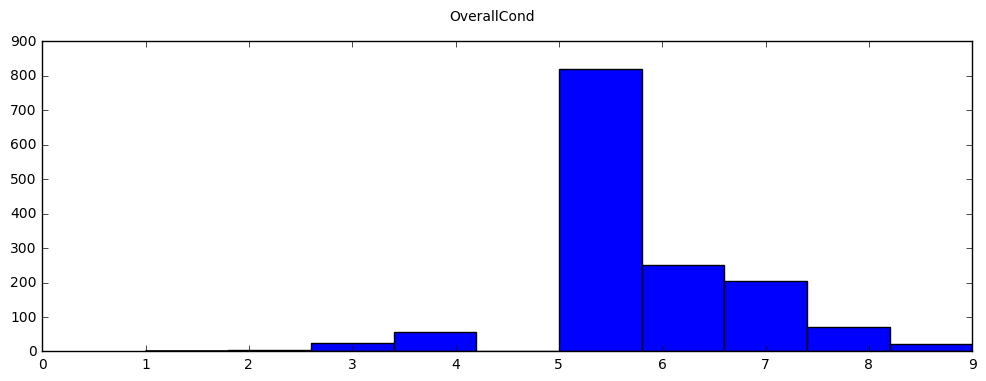

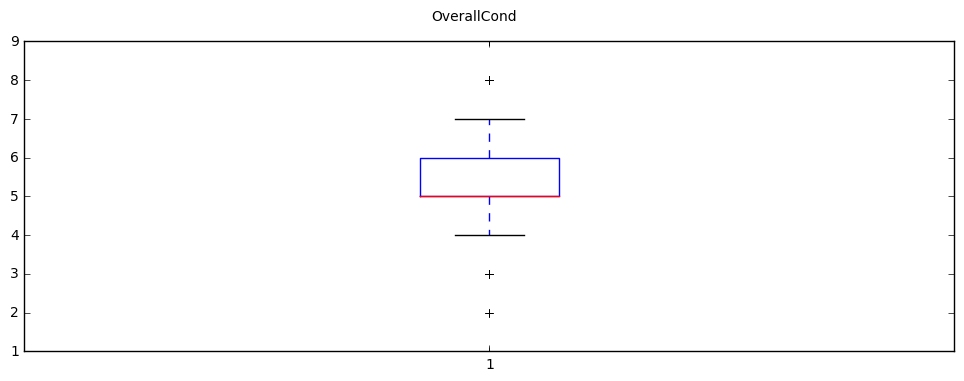

YearBuilt
YearBuilt  have  0  NaNs


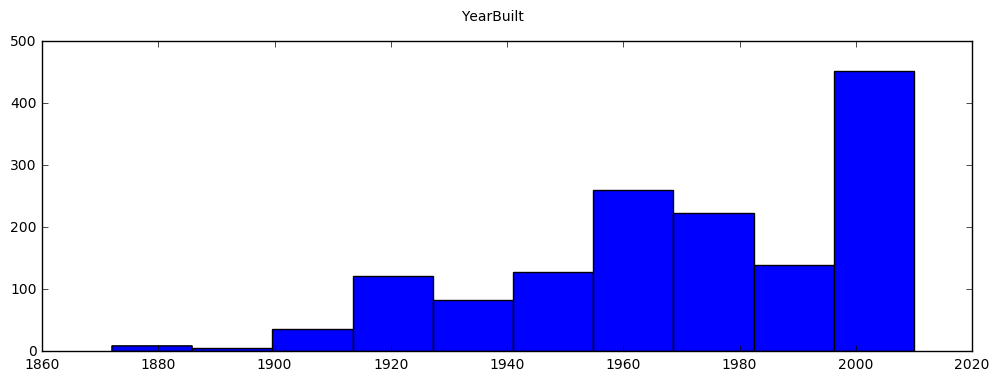

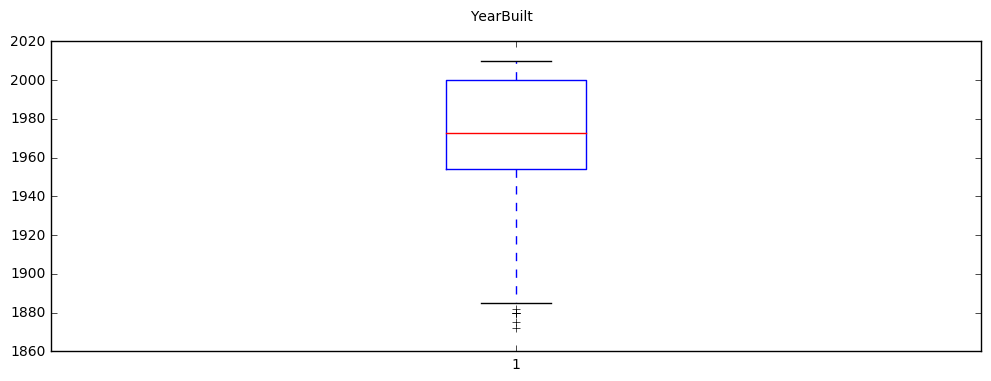

YearRemodAdd
YearRemodAdd  have  0  NaNs


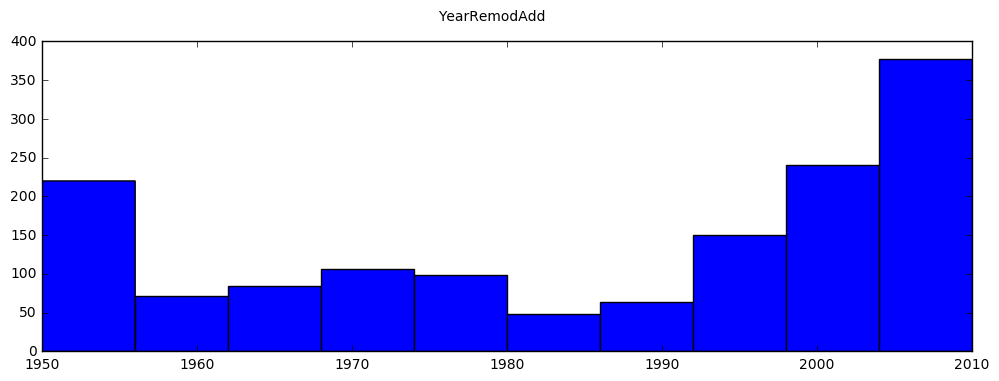

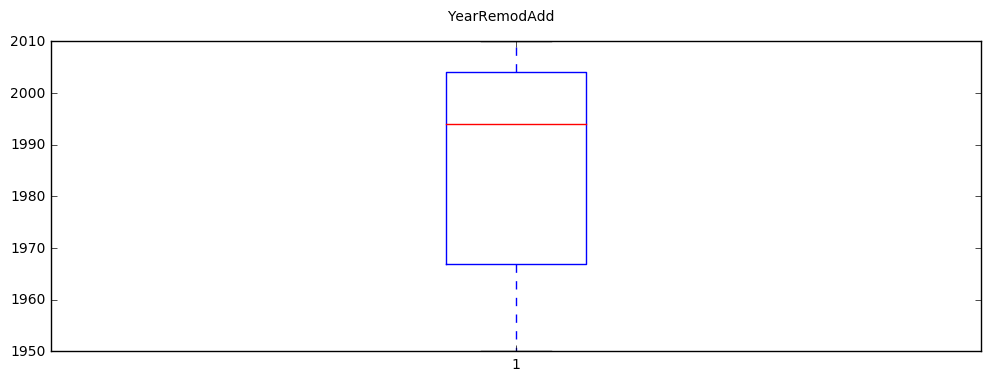

RoofStyle
RoofStyle  have  0  NaNs
RoofMatl
RoofMatl  have  0  NaNs
Exterior1st
Exterior1st  have  0  NaNs
Exterior2nd
Exterior2nd  have  0  NaNs
MasVnrType
MasVnrType  have  8  NaNs
MasVnrArea
MasVnrArea  have  8  NaNs


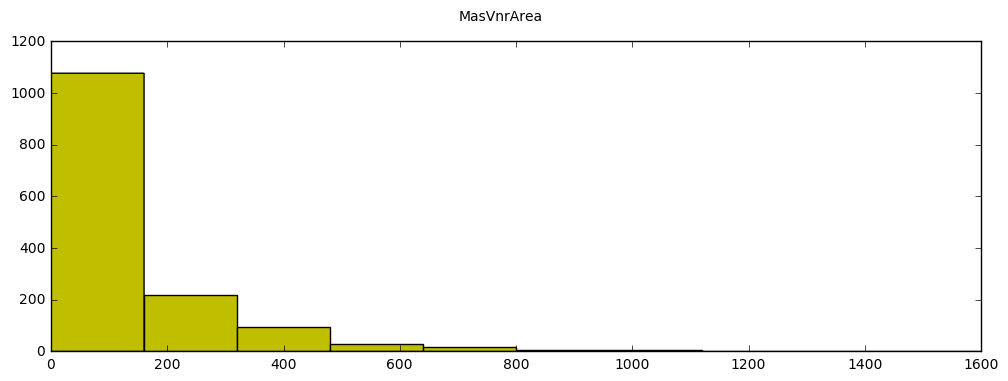

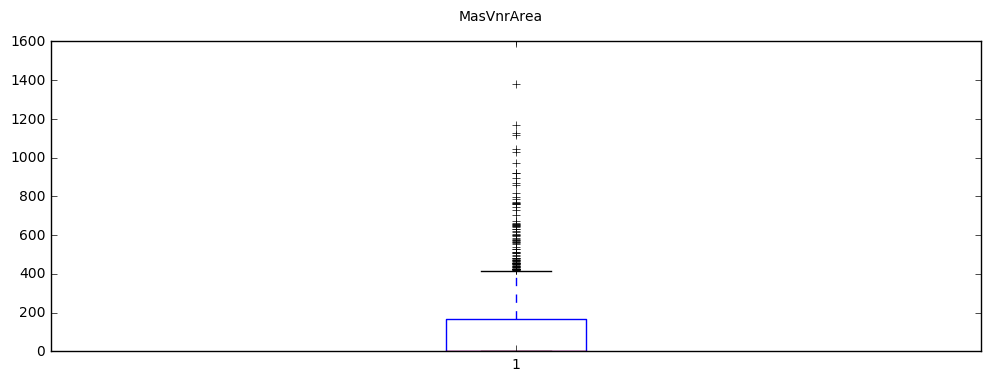

ExterQual
ExterQual  have  0  NaNs
ExterCond
ExterCond  have  0  NaNs
Foundation
Foundation  have  0  NaNs
BsmtQual
BsmtQual  have  37  NaNs
BsmtCond
BsmtCond  have  37  NaNs
BsmtExposure
BsmtExposure  have  38  NaNs
BsmtFinType1
BsmtFinType1  have  37  NaNs
BsmtFinSF1
BsmtFinSF1  have  0  NaNs


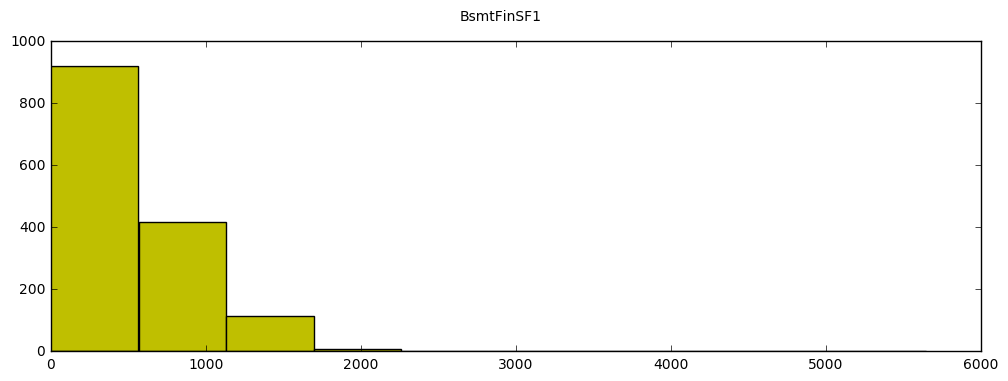

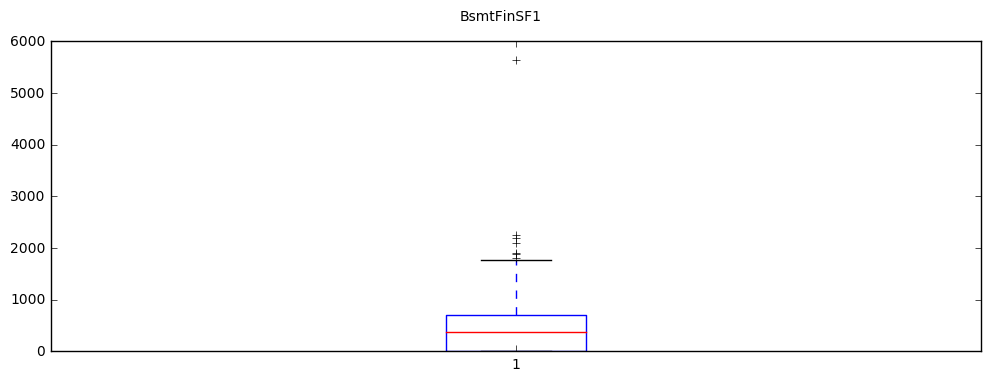

BsmtFinType2
BsmtFinType2  have  38  NaNs
BsmtFinSF2
BsmtFinSF2  have  0  NaNs


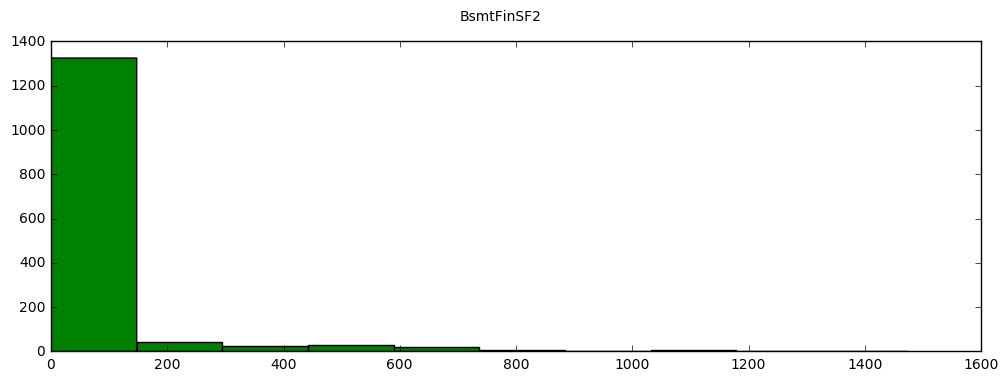

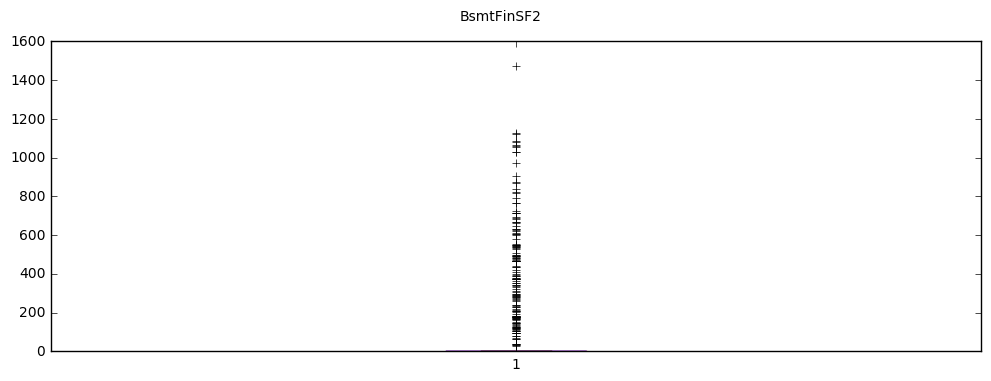

BsmtUnfSF
BsmtUnfSF  have  0  NaNs


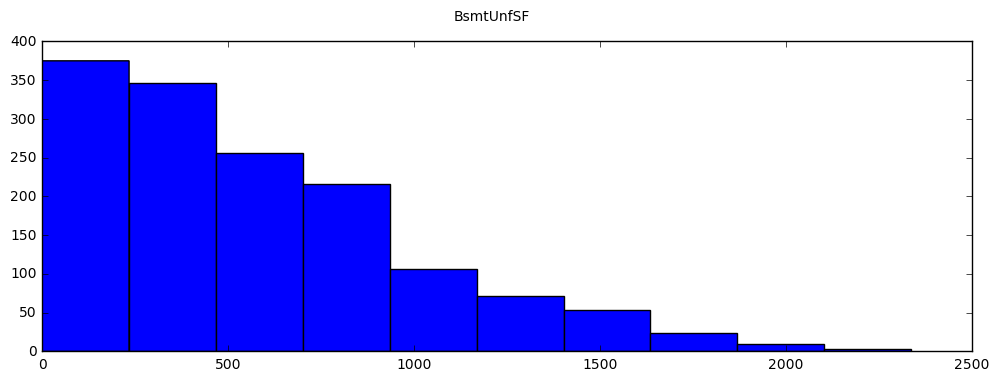

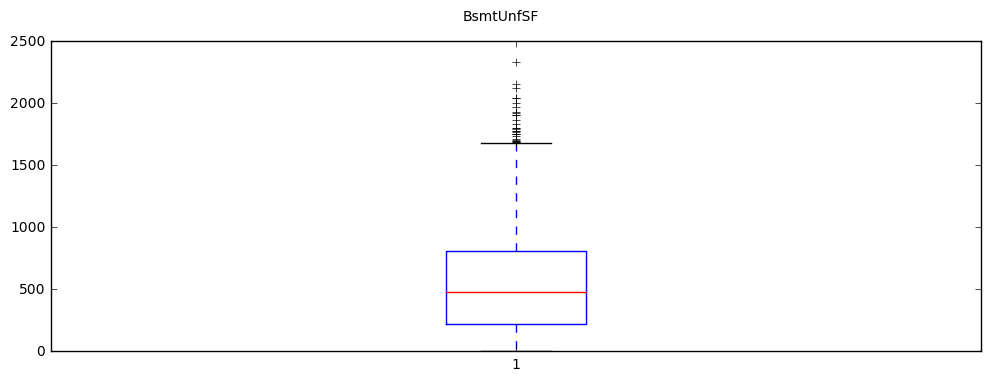

TotalBsmtSF
TotalBsmtSF  have  0  NaNs


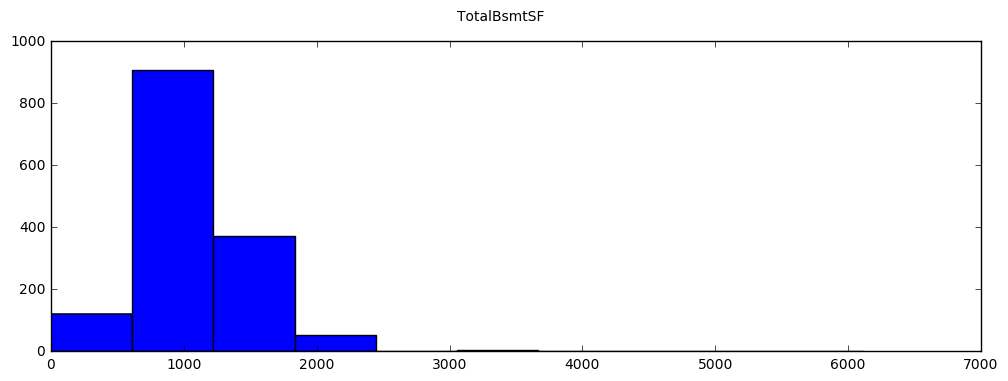

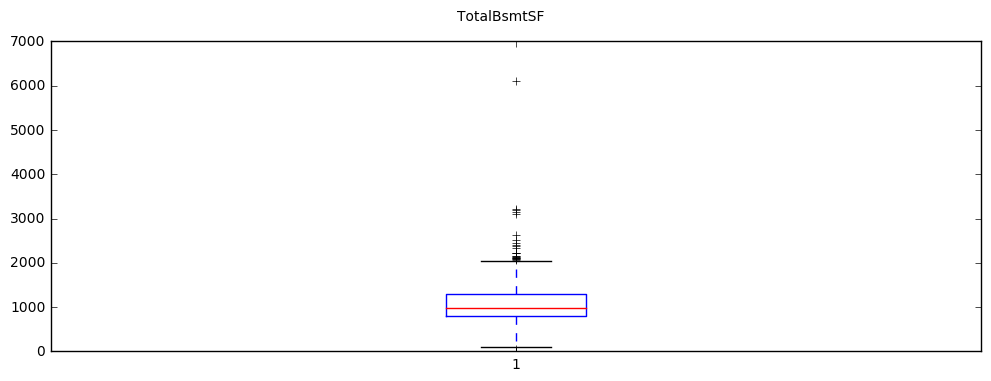

Heating
Heating  have  0  NaNs
HeatingQC
HeatingQC  have  0  NaNs
CentralAir
CentralAir  have  0  NaNs
Electrical
Electrical  have  1  NaNs
1stFlrSF
1stFlrSF  have  0  NaNs


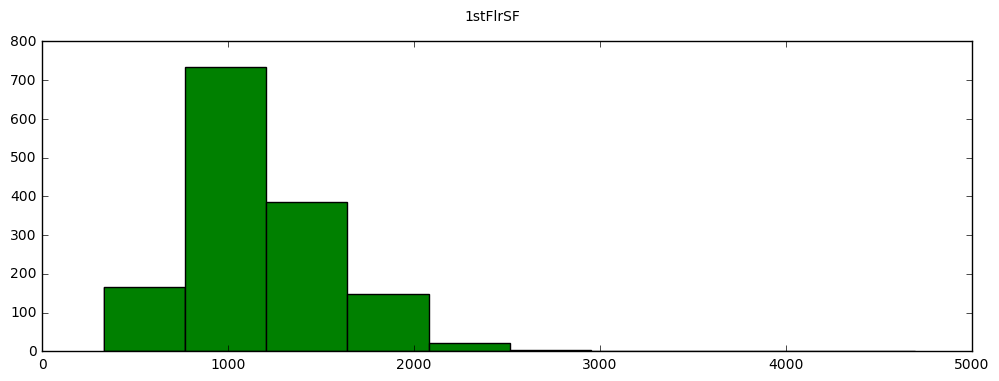

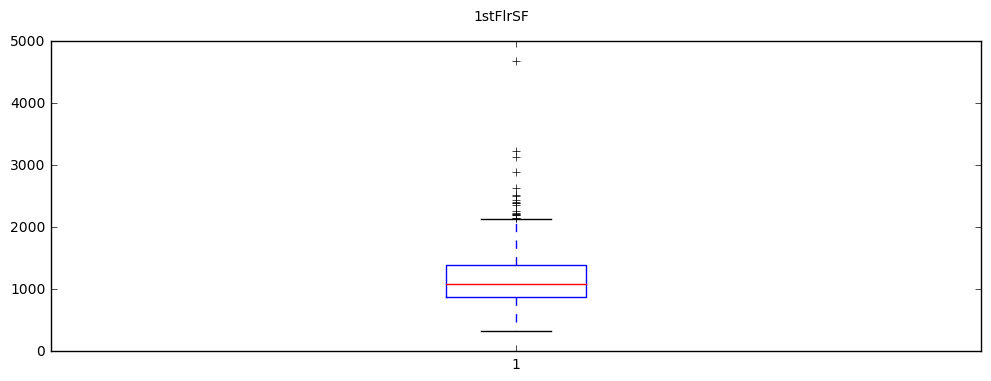

2ndFlrSF
2ndFlrSF  have  0  NaNs


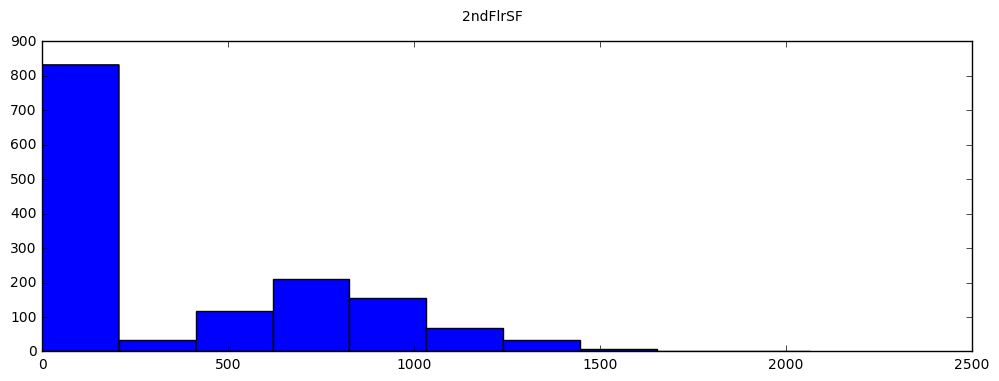

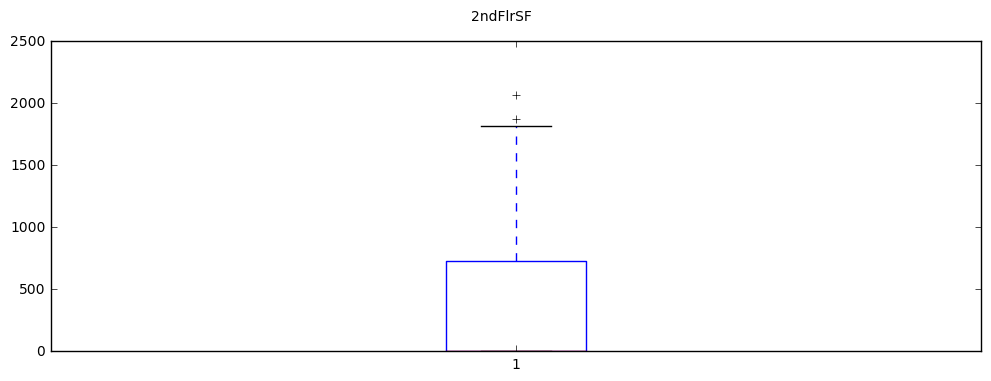

LowQualFinSF
LowQualFinSF  have  0  NaNs


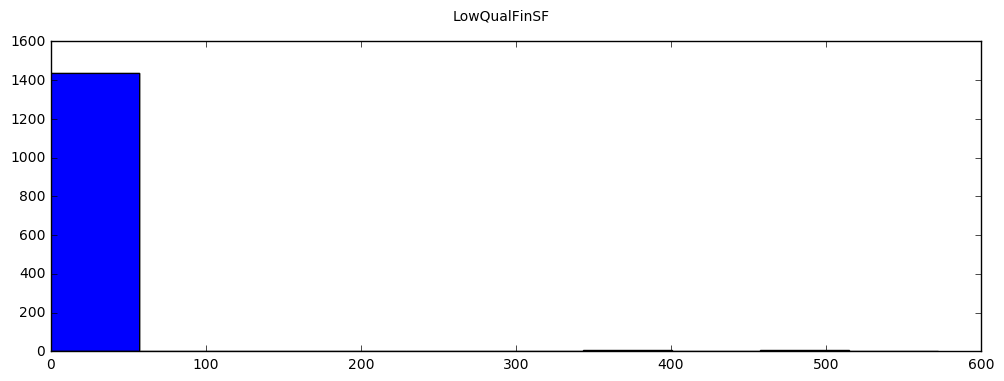

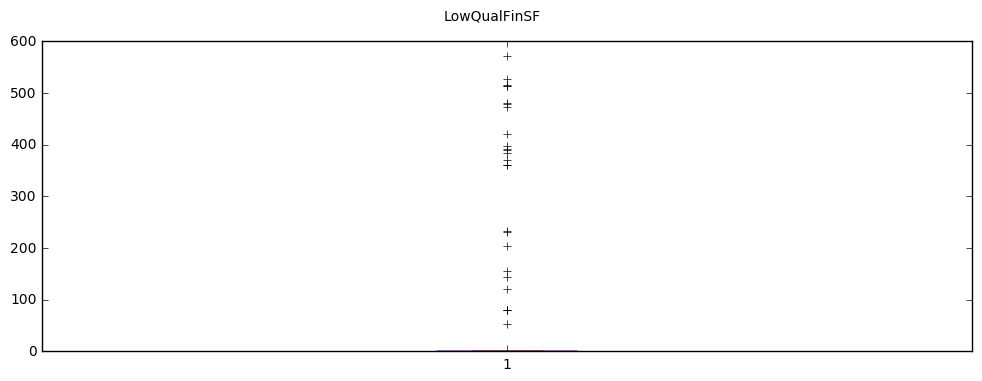

GrLivArea
GrLivArea  have  0  NaNs


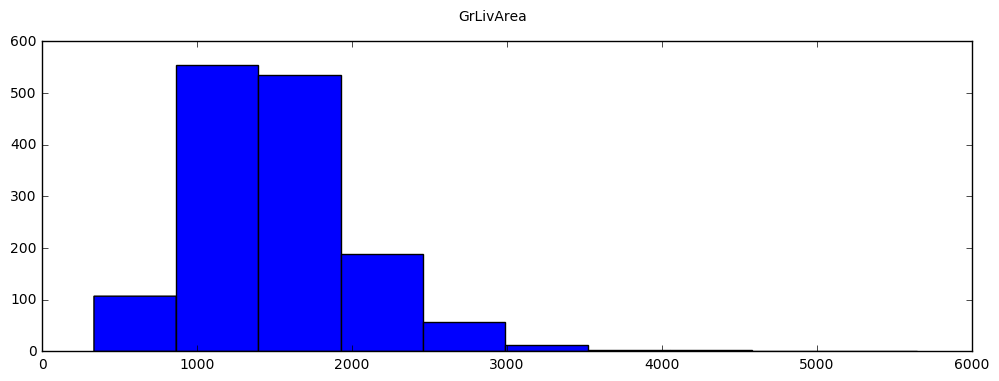

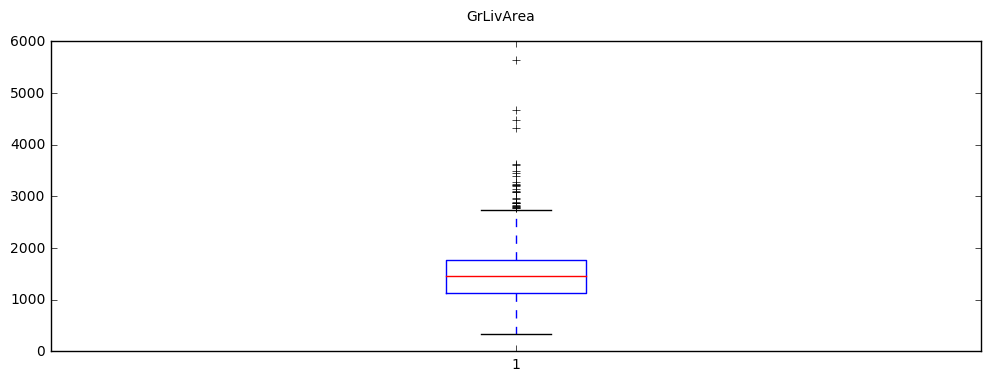

BsmtFullBath
BsmtFullBath  have  0  NaNs


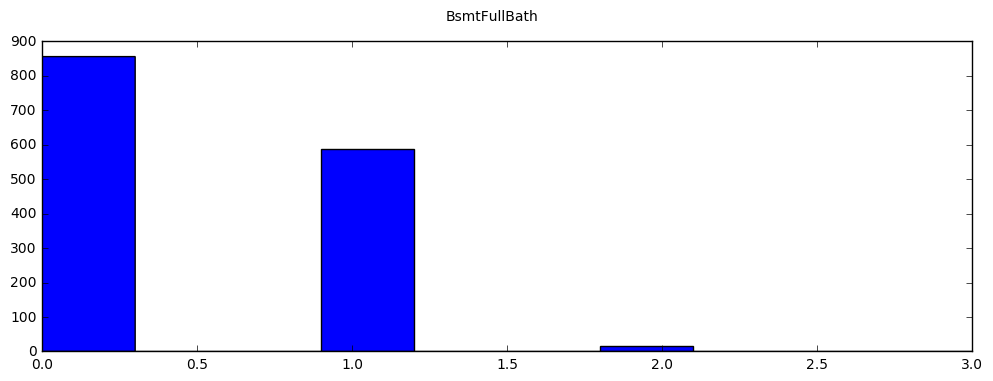

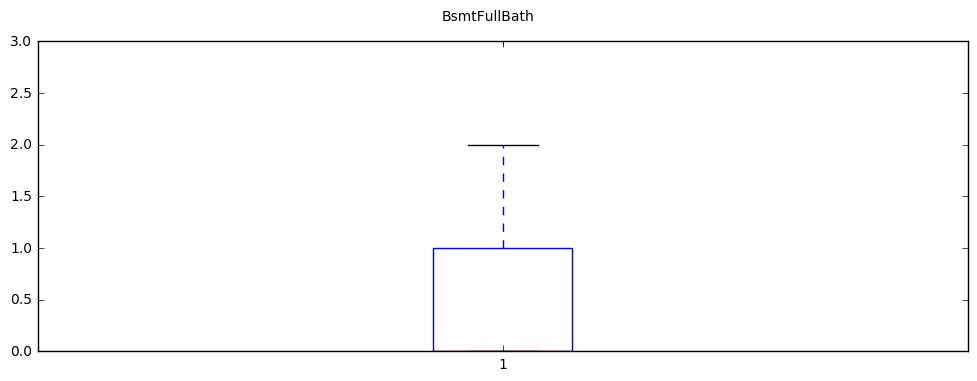

BsmtHalfBath
BsmtHalfBath  have  0  NaNs


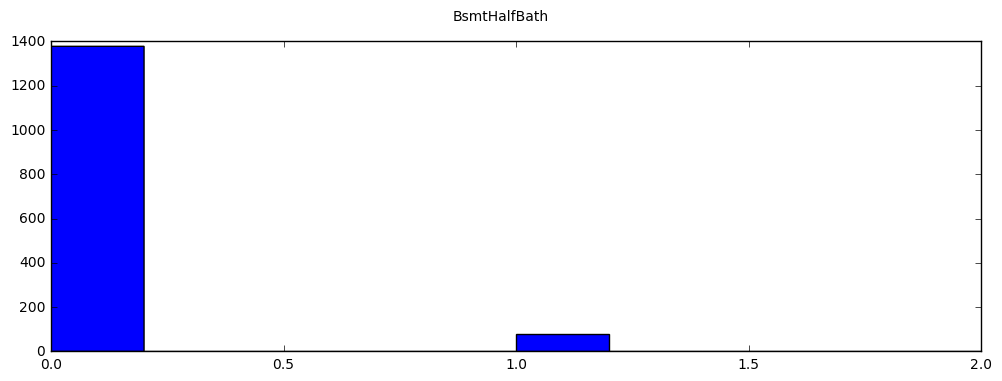

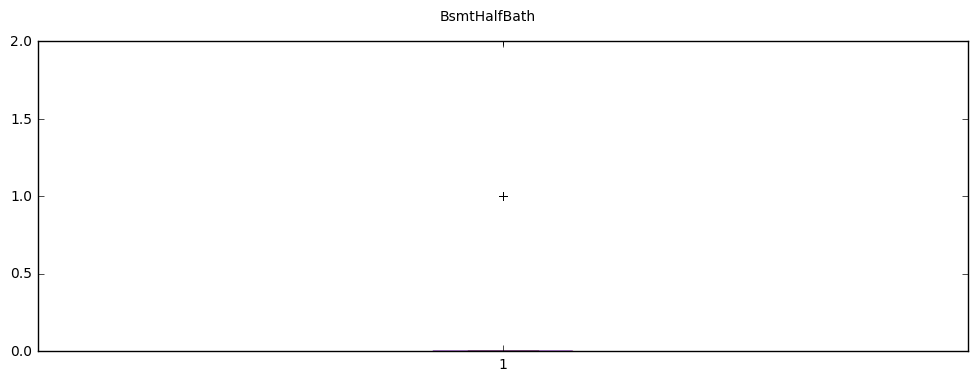

FullBath
FullBath  have  0  NaNs


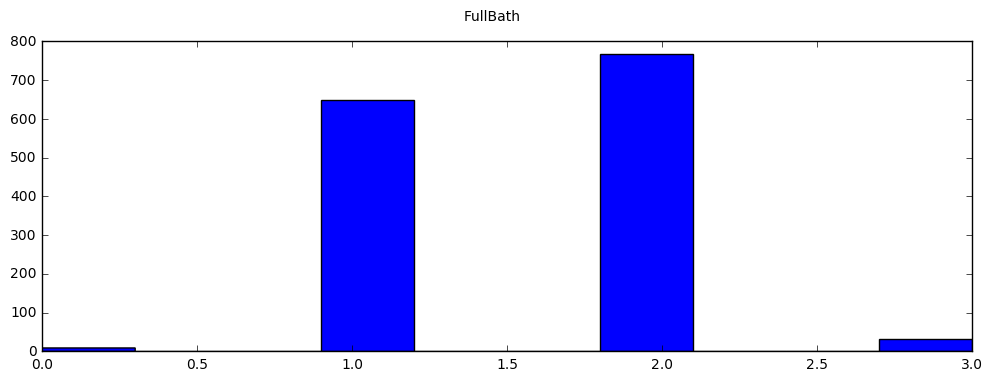

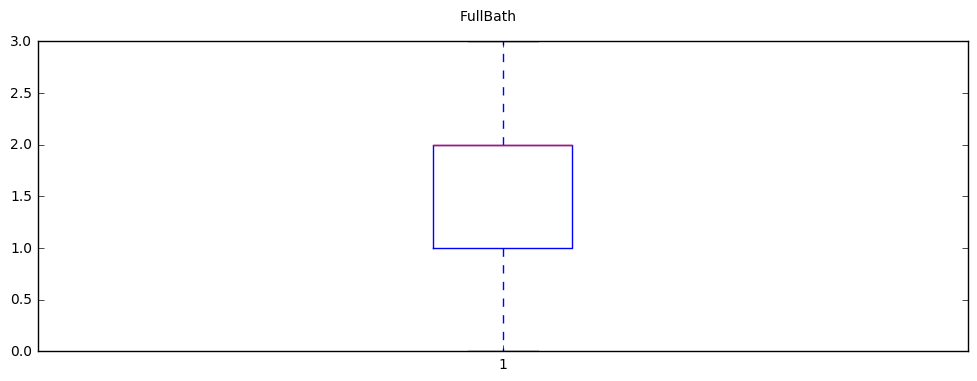

HalfBath
HalfBath  have  0  NaNs


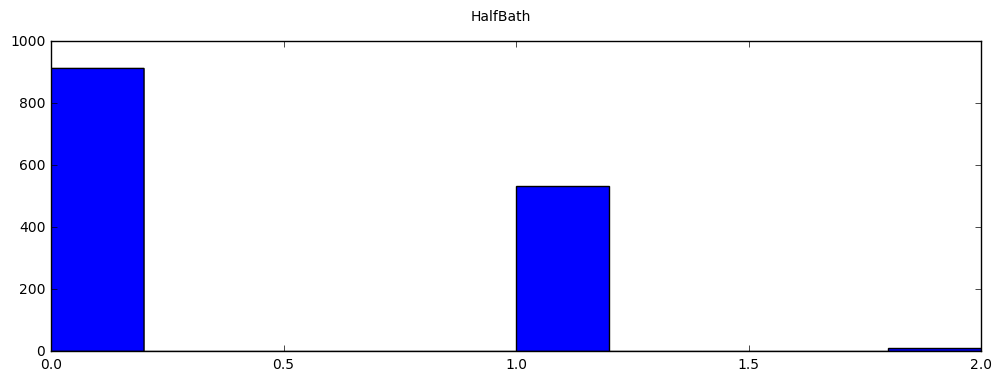

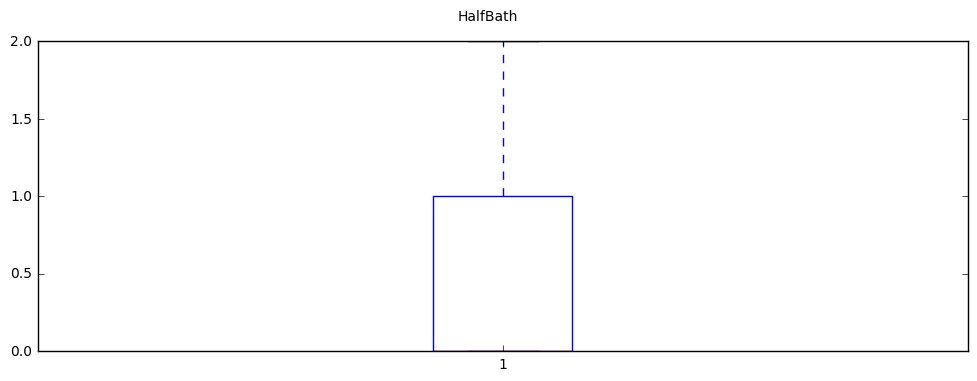

BedroomAbvGr
BedroomAbvGr  have  0  NaNs


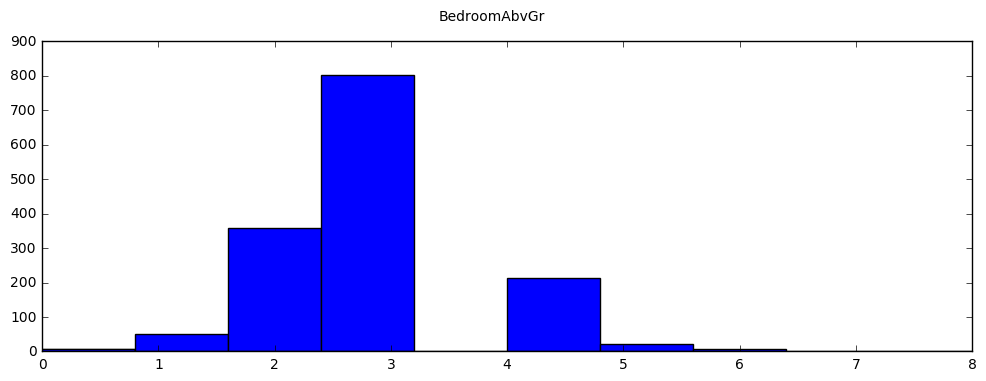

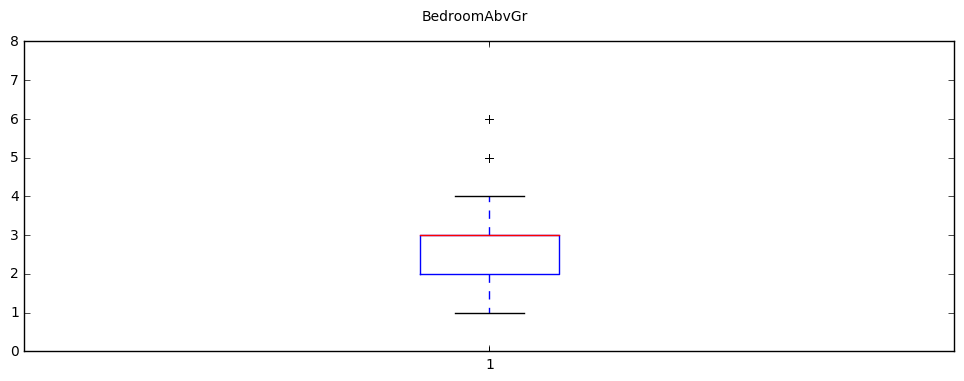

KitchenAbvGr
KitchenAbvGr  have  0  NaNs


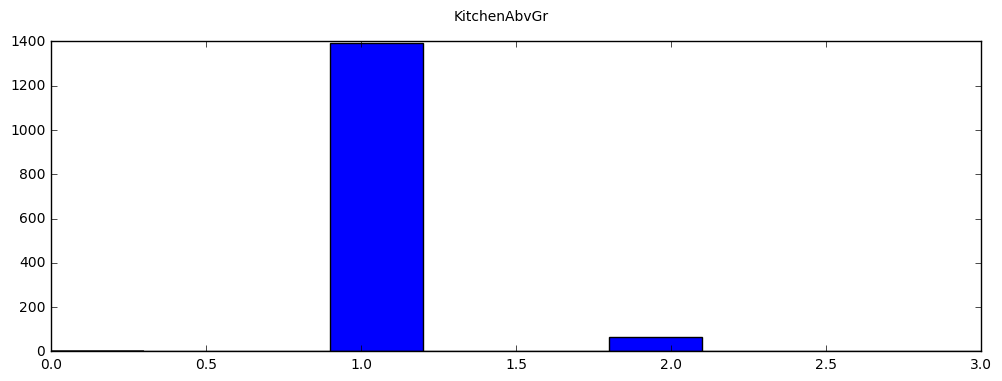

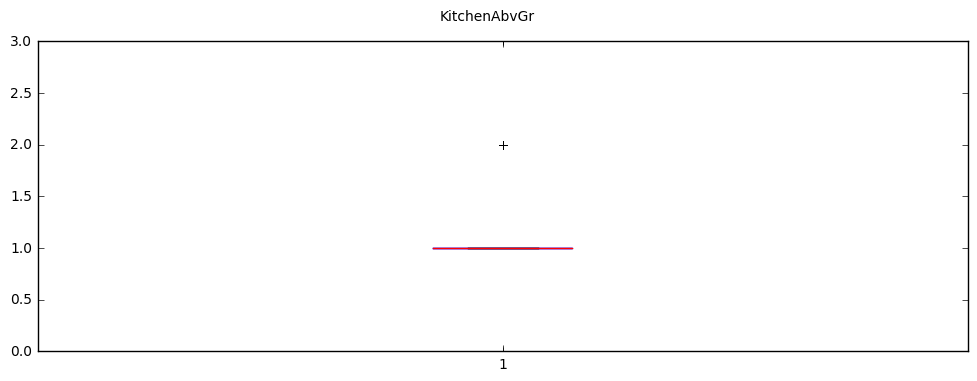

KitchenQual
KitchenQual  have  0  NaNs
TotRmsAbvGrd
TotRmsAbvGrd  have  0  NaNs


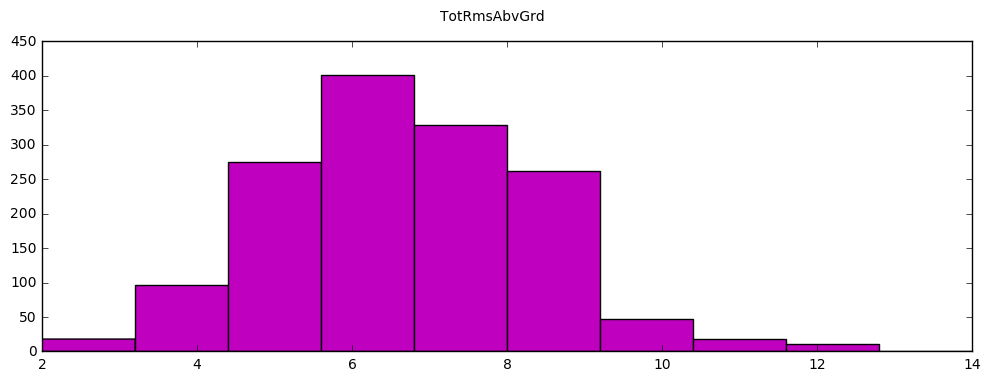

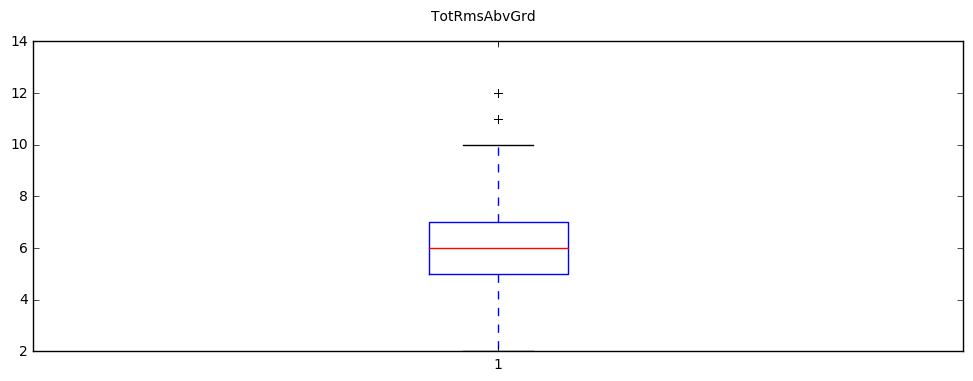

Functional
Functional  have  0  NaNs
Fireplaces
Fireplaces  have  0  NaNs


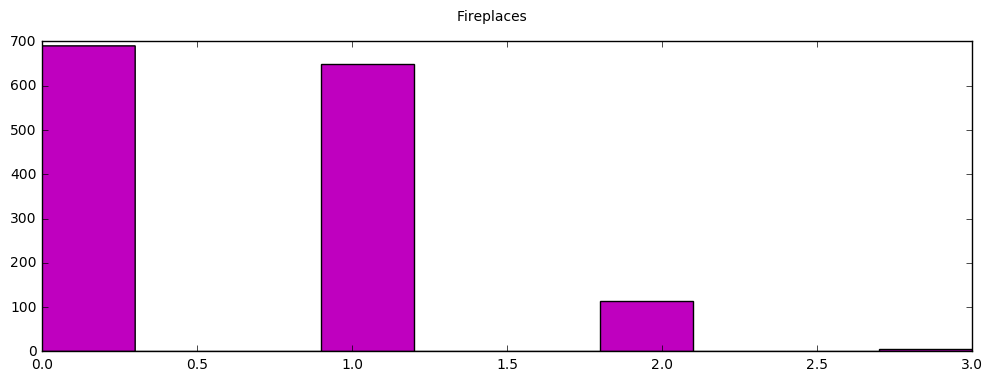

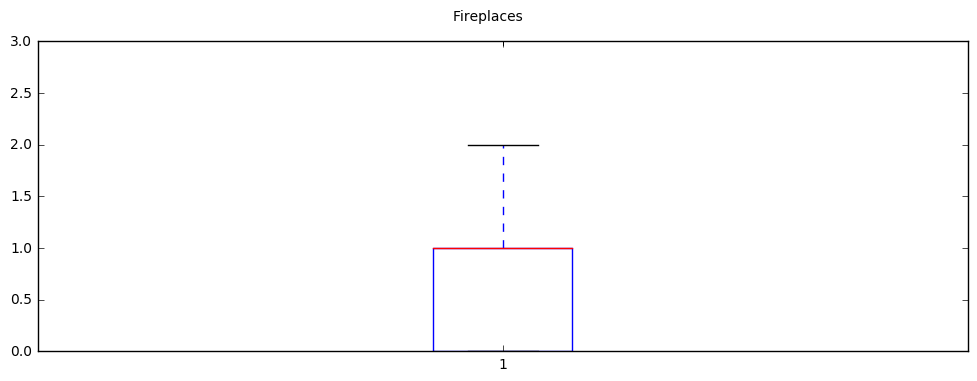

FireplaceQu
FireplaceQu  have  690  NaNs
GarageType
GarageType  have  81  NaNs
GarageYrBlt
GarageYrBlt  have  81  NaNs


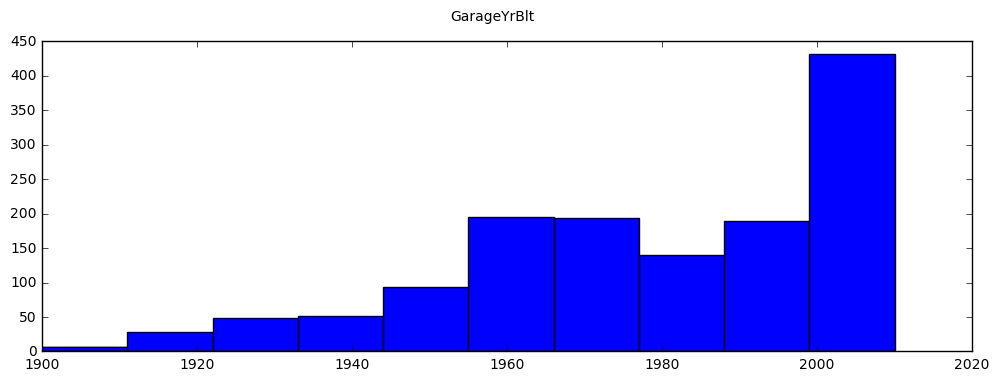

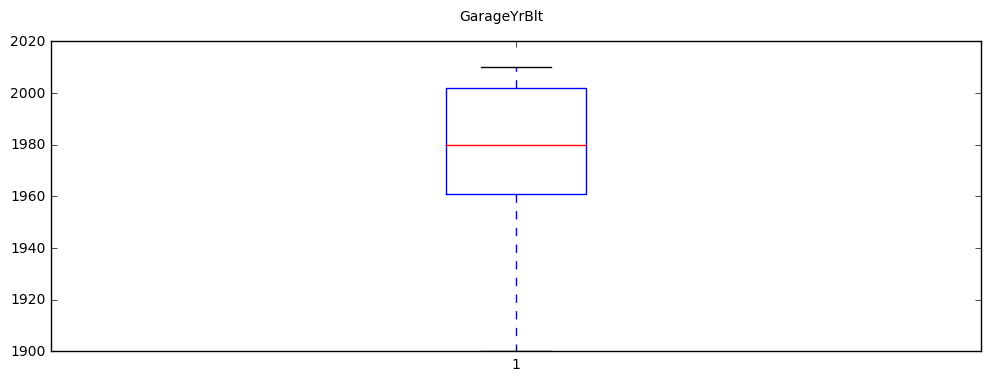

GarageFinish
GarageFinish  have  81  NaNs
GarageCars
GarageCars  have  0  NaNs


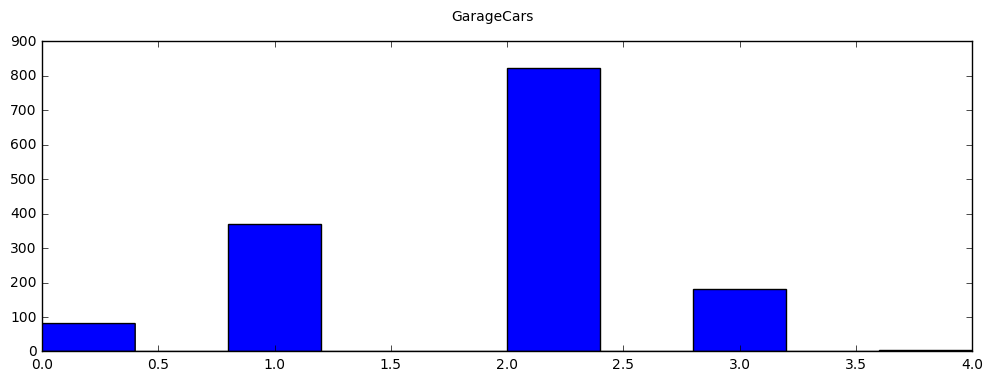

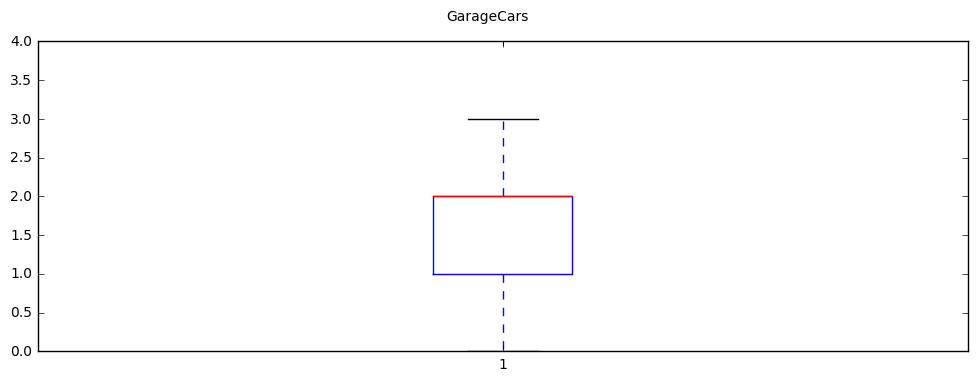

GarageArea
GarageArea  have  0  NaNs


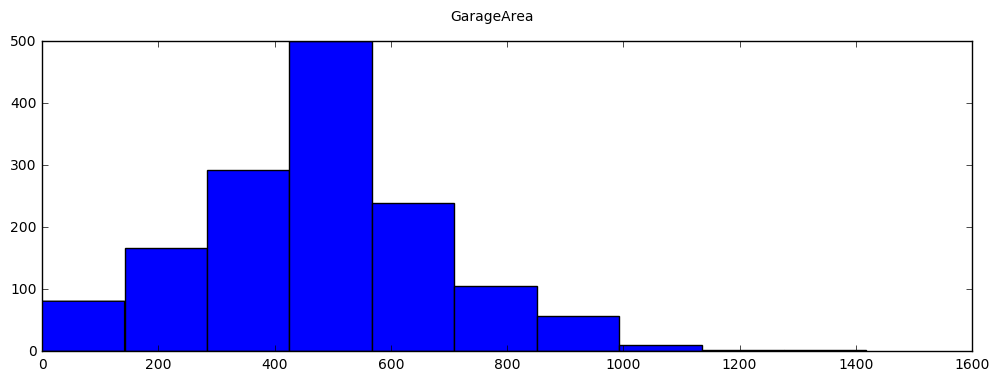

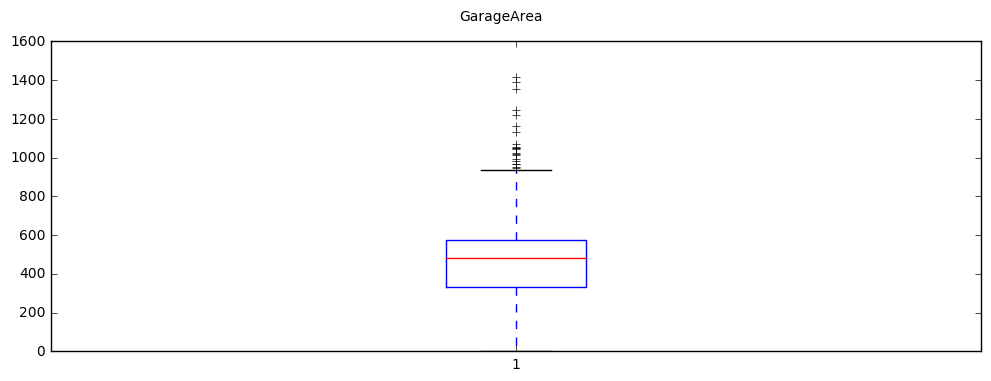

GarageQual
GarageQual  have  81  NaNs
GarageCond
GarageCond  have  81  NaNs
PavedDrive
PavedDrive  have  0  NaNs
WoodDeckSF
WoodDeckSF  have  0  NaNs


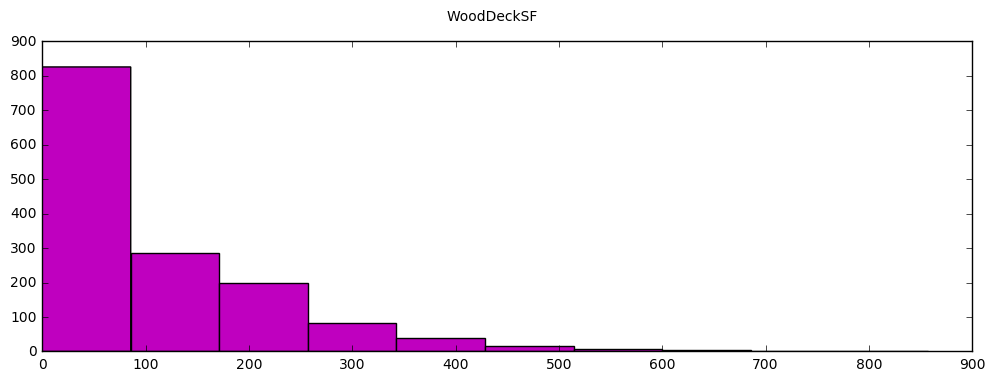

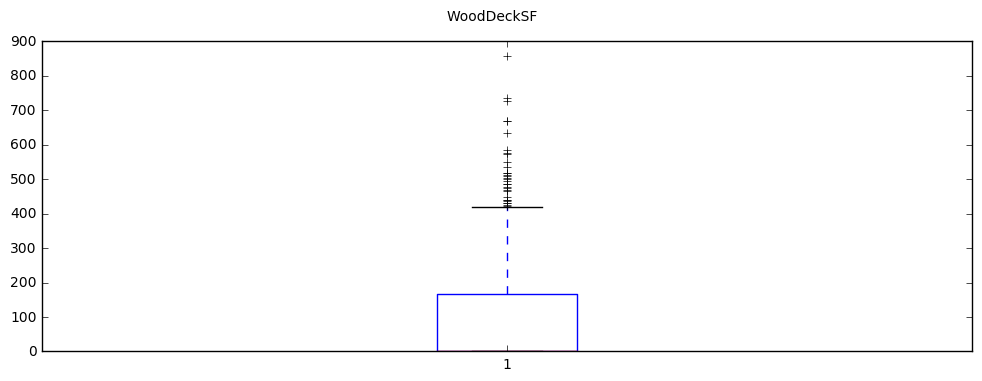

OpenPorchSF
OpenPorchSF  have  0  NaNs


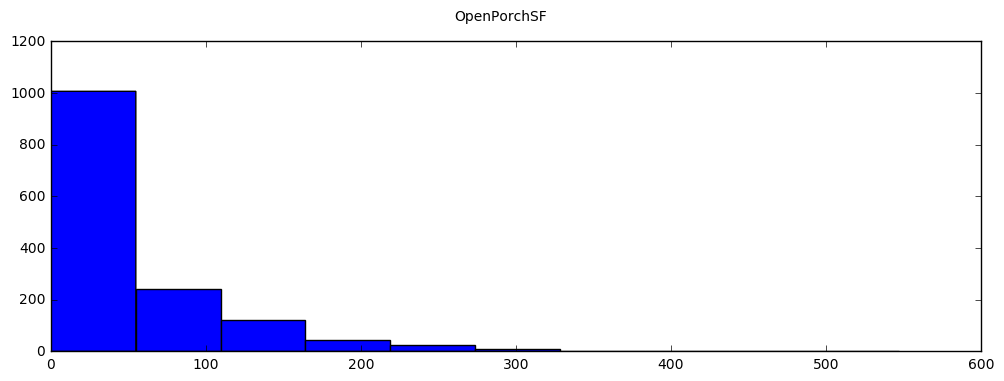

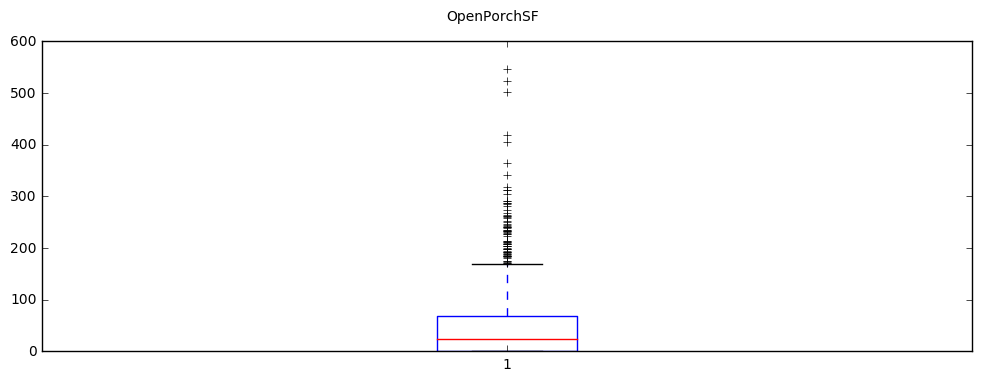

EnclosedPorch
EnclosedPorch  have  0  NaNs


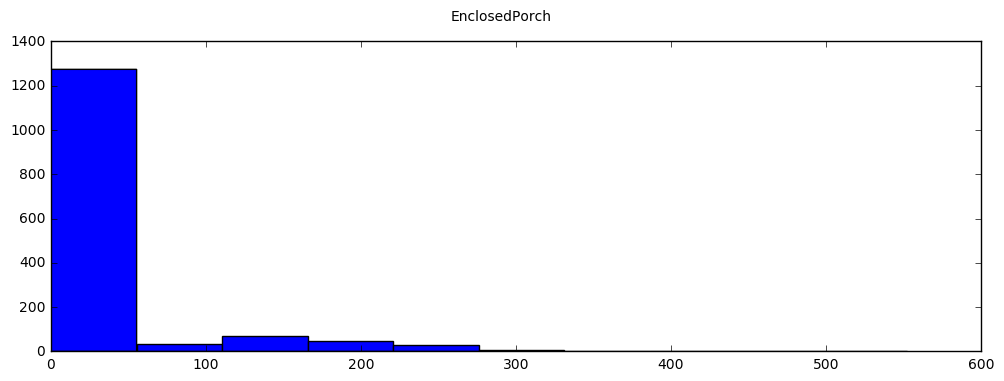

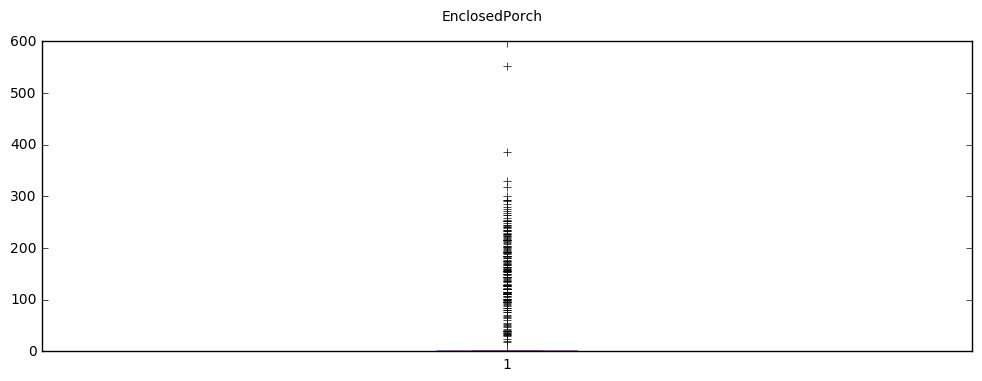

3SsnPorch
3SsnPorch  have  0  NaNs


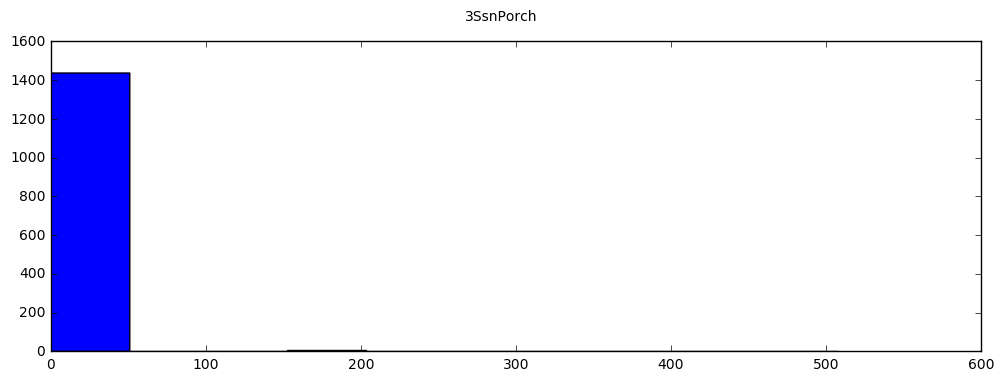

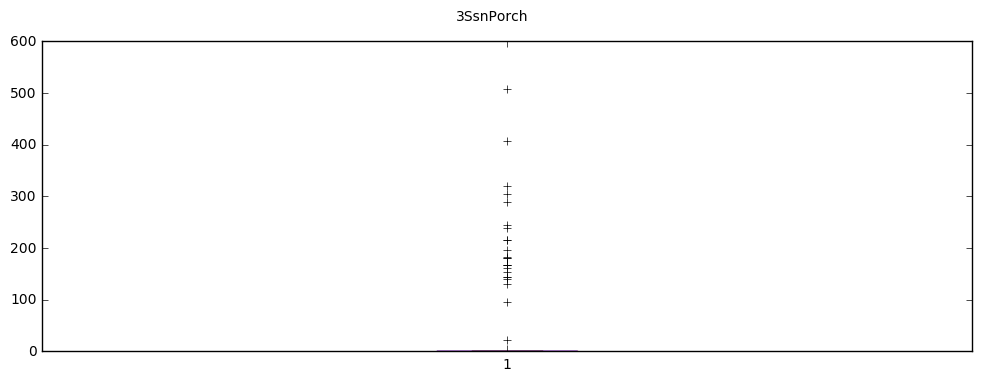

ScreenPorch
ScreenPorch  have  0  NaNs


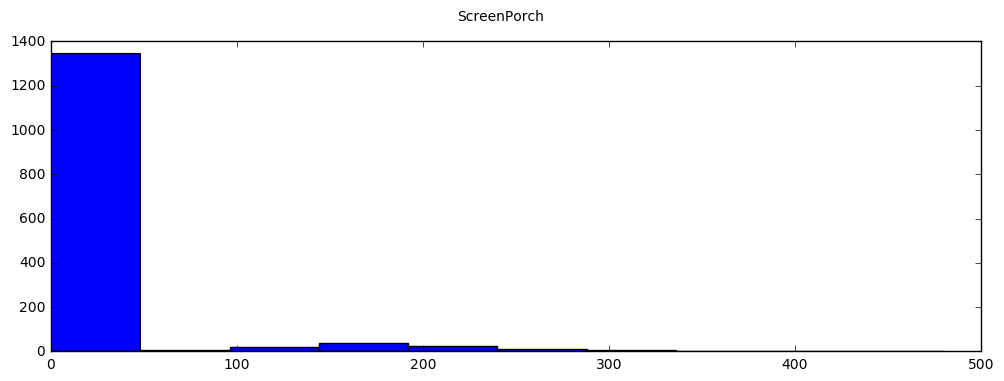

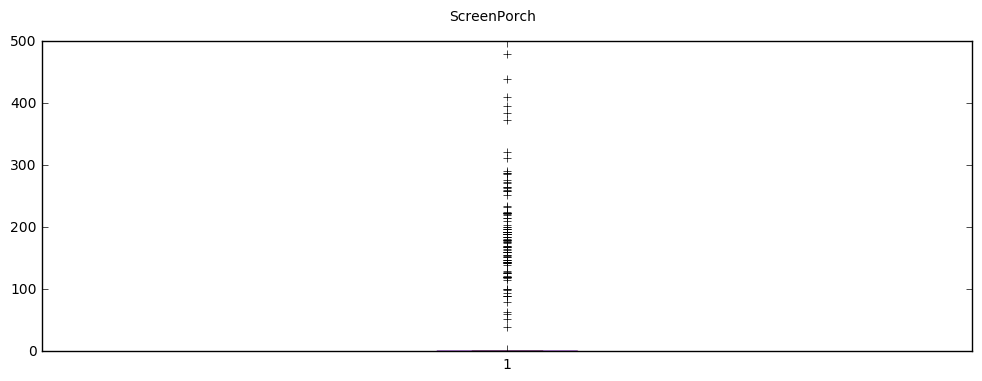

PoolArea
PoolArea  have  0  NaNs


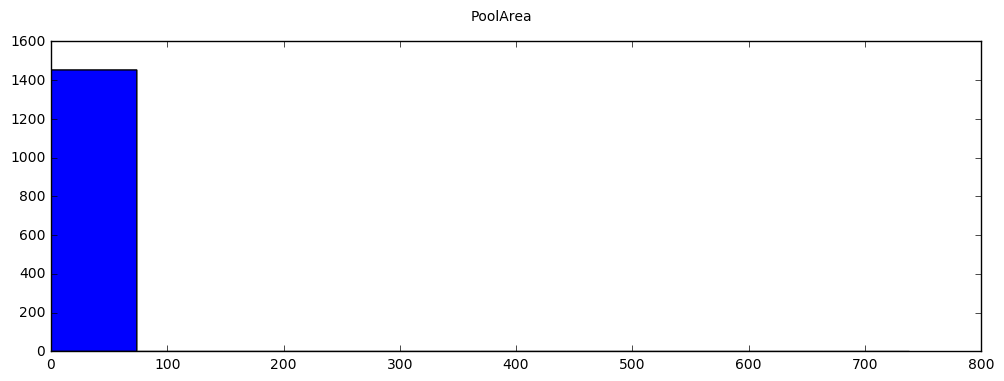

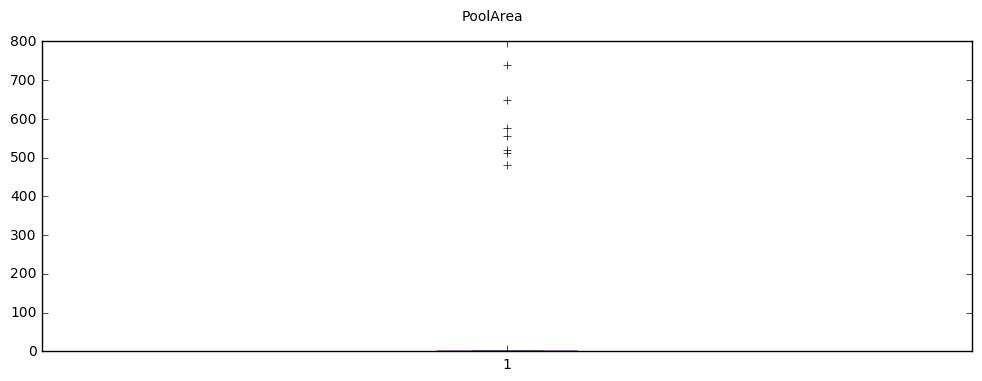

PoolQC
PoolQC  have  1453  NaNs
Fence
Fence  have  1179  NaNs
MiscFeature
MiscFeature  have  1406  NaNs
MiscVal
MiscVal  have  0  NaNs


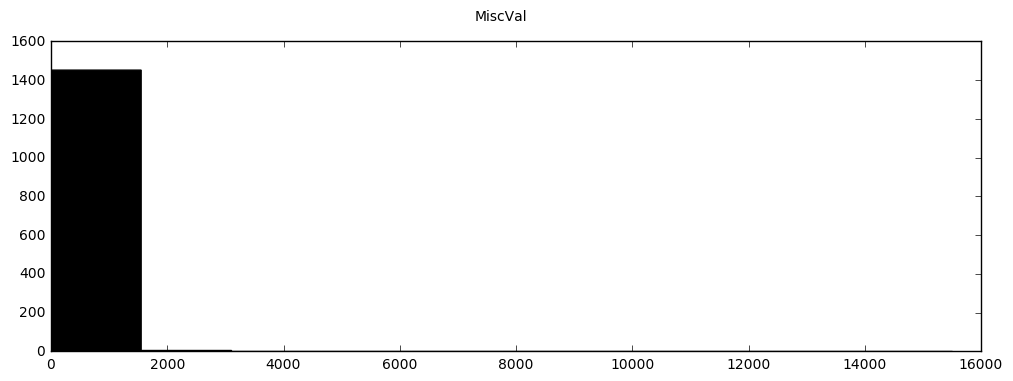

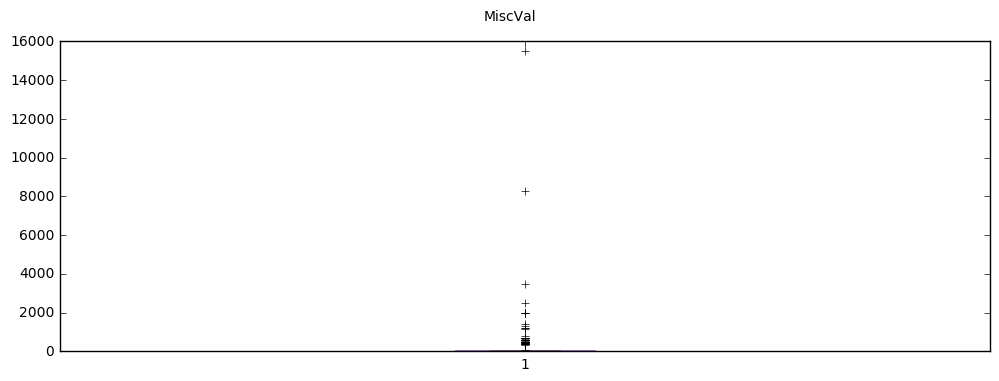

MoSold
MoSold  have  0  NaNs


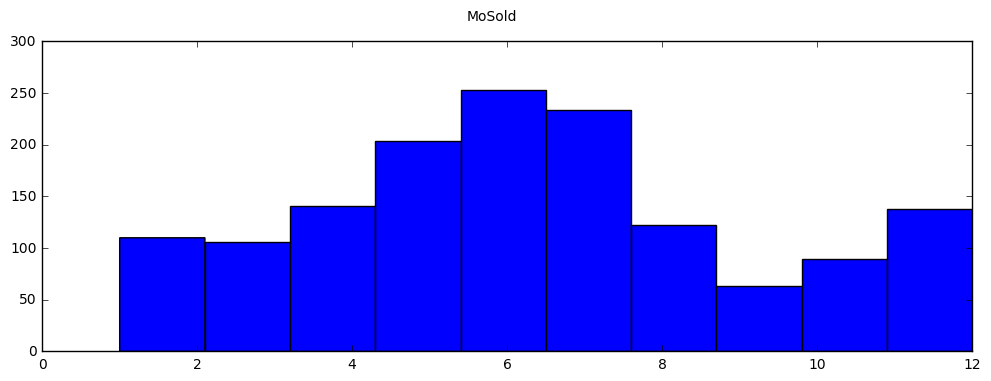

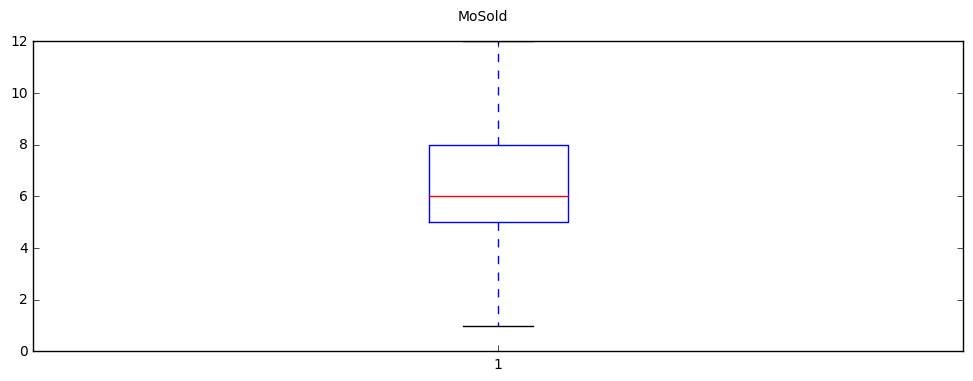

YrSold
YrSold  have  0  NaNs


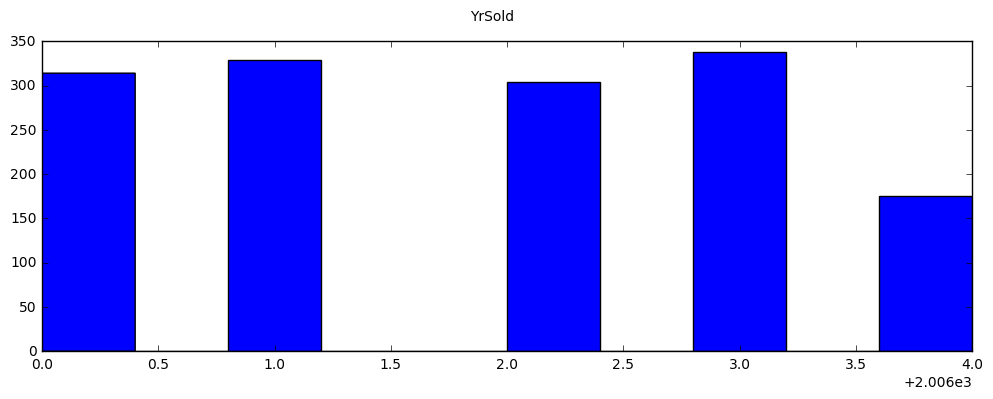

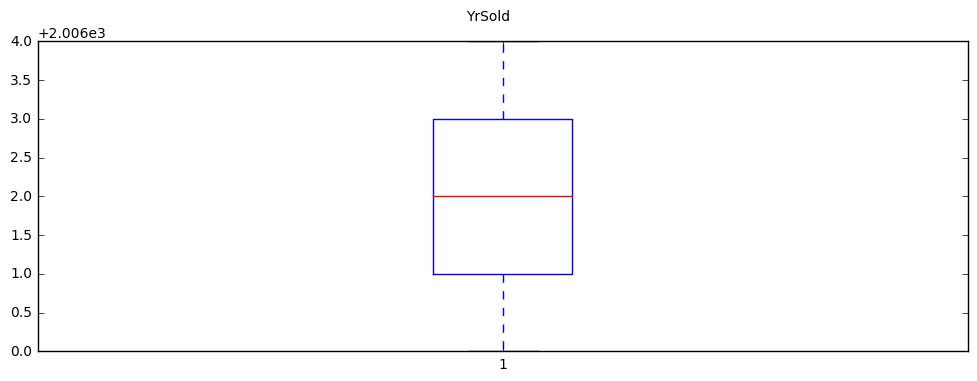

SaleType
SaleType  have  0  NaNs
SaleCondition
SaleCondition  have  0  NaNs
SalePrice
SalePrice  have  0  NaNs


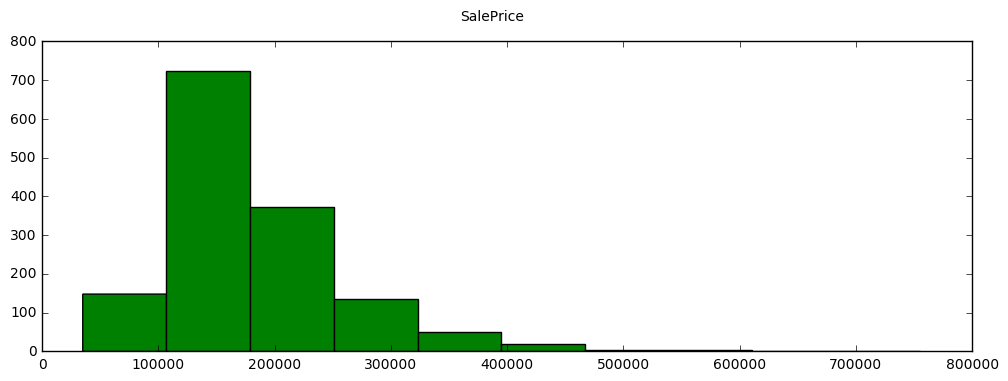

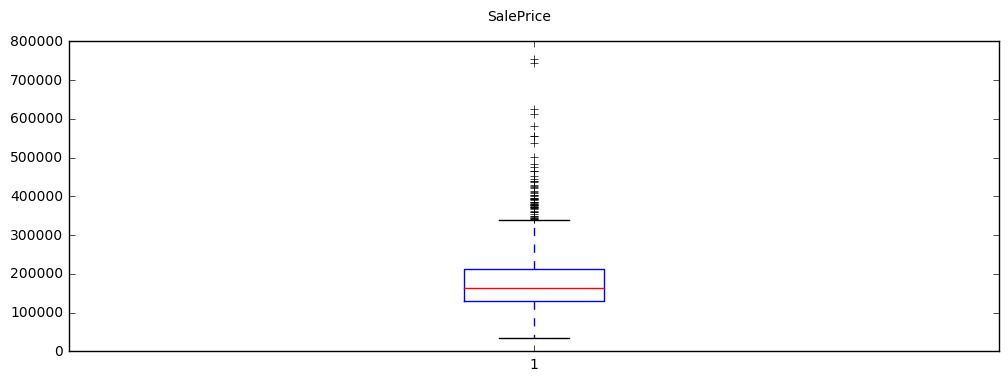

In [8]:
for col in data.columns:
    #print('Number of NAs: ',sum(data[col].isnull()))#We don't have missing values.
    print(col)
    try:
        print(col,' have ',sum(data[col].isnull()),' NaNs')
        plt.hist(data[col].dropna())
        plt.suptitle(col)
        plt.show()
        plt.suptitle(col)
        plt.boxplot(data[col].dropna())
        plt.show()
    except:
        pass

We could try to make some transformations in order to improve the performance of the algoritmns.

## Feature Transform.
We will do this observing the previous graphics.

In [9]:
X_data = data.drop('SalePrice',1)
Y_data= data['SalePrice']

if test_kaggle.index[0]==0:
    test_kaggle.index=test_kaggle.index+1460#do only one time
mixed_data=pd.concat([X_data,test_kaggle])

In [10]:
#MSZoning
def densiti_residential(s):
    if s=='RL' or s=='RP' or s=='FV':
        return (0)
    if s=='RM':
        return (1)
    if s=='RH':
        return (2)
    else:
        return (3)
    
    
mixed_data['MSZoning_residential']=mixed_data['MSZoning'].apply(lambda x: densiti_residential(x))

In [11]:
#LotArea
mixed_data['logLotArea']=mixed_data['LotArea'].apply(math.log)

In [12]:
#Alley
mixed_data['Alley']=mixed_data['Alley'].fillna('NA')

In [13]:
#LotShape
mixed_data.loc[mixed_data['LotShape']=='Reg','LotShape']='IR0'

In [14]:
#LotShape
le = preprocessing.LabelEncoder()
le.fit(mixed_data['LotShape'].unique())

mixed_data['LotShape_trans']=le.transform(mixed_data['LotShape'])
#mixed_data=mixed_data.drop('LotShape',1)

In [15]:
#LandContour
mixed_data['LandContour2']=mixed_data['LandContour'].copy()
mixed_data.loc[mixed_data['LandContour']=='Lvl','LandContour']='0'
mixed_data.loc[mixed_data['LandContour']=='Bnk','LandContour']='1'
mixed_data.loc[mixed_data['LandContour']=='HLS','LandContour']='2'
mixed_data.loc[mixed_data['LandContour']=='Low','LandContour']='3'

le = preprocessing.LabelEncoder()
le.fit(mixed_data['LandContour'].unique())
mixed_data['LandContour_trans']=le.transform(mixed_data['LandContour'])
mixed_data=mixed_data.drop('LandContour',1)

In [16]:
#LandSlope
le = preprocessing.LabelEncoder()
le.fit(mixed_data['LandSlope'].unique())
mixed_data['LandSlope_trans']=le.transform(mixed_data['LandSlope'])
#mixed_data=mixed_data.drop('LandSlope',1)

In [17]:
#Neigborhood too much categories
mixed_data=mixed_data.drop('Neighborhood',1)

In [18]:
#Condition1
mixed_data['Condition12']=mixed_data['Condition1'].copy()
mixed_data.loc[mixed_data['Condition1']=='Artery','Condition1']='0'
mixed_data.loc[mixed_data['Condition1']=='Feedr','Condition1']='1'
mixed_data.loc[mixed_data['Condition1']=='Normal','Condition1']='2'
mixed_data.loc[mixed_data['Condition1']=='RRNn','Condition1']='3'
mixed_data.loc[mixed_data['Condition1']=='PosN','Condition1']='3'
mixed_data.loc[mixed_data['Condition1']=='PosA','Condition1']='3'
mixed_data.loc[mixed_data['Condition1']=='RRNe','Condition1']='3'
mixed_data.loc[mixed_data['Condition1']=='RRAe','Condition1']='3'

In [19]:
le = preprocessing.LabelEncoder()
le.fit(mixed_data['Condition1'].unique())
mixed_data['Condition1_trans']=le.transform(mixed_data['Condition1'])
mixed_data=mixed_data.drop('Condition1',1)

In [20]:
#Condition2
mixed_data['Condition22']=mixed_data['Condition2'].copy()
mixed_data.loc[mixed_data['Condition2']=='Artery','Condition2']='0'
mixed_data.loc[mixed_data['Condition2']=='Feedr','Condition2']='1'
mixed_data.loc[mixed_data['Condition2']=='Normal','Condition2']='2'
mixed_data.loc[mixed_data['Condition2']=='RRNn','Condition2']='3'
mixed_data.loc[mixed_data['Condition2']=='PosN','Condition2']='3'
mixed_data.loc[mixed_data['Condition2']=='PosA','Condition2']='3'
mixed_data.loc[mixed_data['Condition2']=='RRNe','Condition2']='3'
mixed_data.loc[mixed_data['Condition2']=='RRAe','Condition2']='3'

le = preprocessing.LabelEncoder()
le.fit(mixed_data['Condition2'].unique())
mixed_data['Condition2_trans']=le.transform(mixed_data['Condition2'])
mixed_data=mixed_data.drop('Condition2',1)

In [21]:
#BldgType
mixed_data.loc[mixed_data['BldgType']=='TwnhsE','BldgType']='Twnhs1'
mixed_data.loc[mixed_data['BldgType']=='Twnhs','BldgType']='Twnhs0'
le = preprocessing.LabelEncoder()
le.fit(mixed_data['BldgType'].unique())
mixed_data['BldgType_trans']=le.transform(mixed_data['BldgType'])
#mixed_data=mixed_data.drop('BldgType',1)

In [22]:
#HouseStyle

mixed_data.loc[mixed_data['HouseStyle']=='1Story','HouseStyle']='1'
mixed_data.loc[mixed_data['HouseStyle']=='2Story','HouseStyle']='2'
le = preprocessing.LabelEncoder()
le.fit(mixed_data['HouseStyle'].unique())

mixed_data['HouseStyle']=le.transform(mixed_data['HouseStyle'])
#mixed_data=mixed_data.drop('HouseStyle',1)

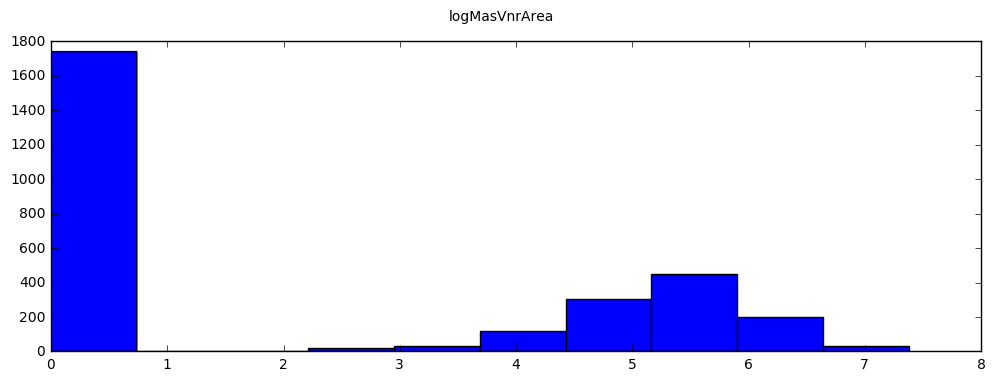

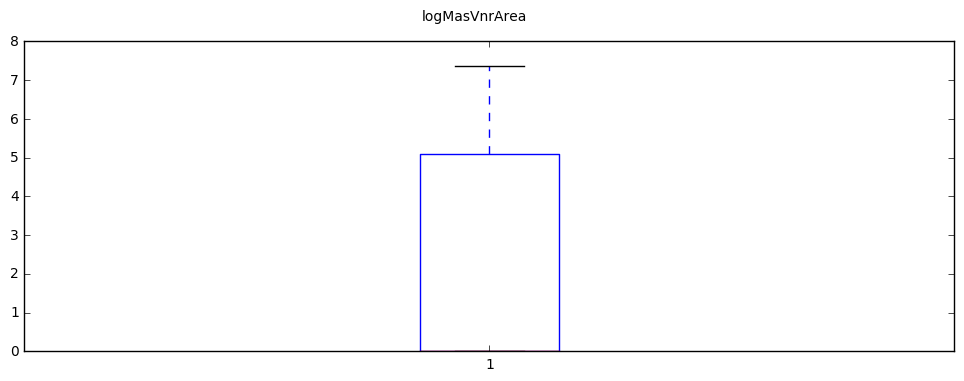

In [23]:
#MasVnrArea
mixed_data['logMasVnrArea']=mixed_data['MasVnrArea'].apply(lambda x: math.log(x+1))

col='logMasVnrArea'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logMasVnrArea_0']=mixed_data['logMasVnrArea']==0 
mixed_data['logMasVnrArea_0']=mixed_data['logMasVnrArea_0'].astype('int')

In [24]:
#ExterQual
mixed_data['ExterQual2']=mixed_data['ExterQual'].copy()
mixed_data.loc[mixed_data['ExterQual']=='Ex','ExterQual']='4'
mixed_data.loc[mixed_data['ExterQual']=='Gd','ExterQual']='3'
mixed_data.loc[mixed_data['ExterQual']=='TA','ExterQual']='2'
mixed_data.loc[mixed_data['ExterQual']=='Fa','ExterQual']='1'
mixed_data.loc[mixed_data['ExterQual']=='Po','ExterQual']='0'

le = preprocessing.LabelEncoder()
le.fit(mixed_data['ExterQual'].unique())
mixed_data['ExterQual_trans']=le.transform(mixed_data['ExterQual'])
mixed_data=mixed_data.drop('ExterQual',1)

In [25]:
#ExterCond
mixed_data['ExterCond2']=mixed_data['ExterCond'].copy()
mixed_data.loc[mixed_data['ExterCond']=='Ex','ExterCond']='4'
mixed_data.loc[mixed_data['ExterCond']=='Gd','ExterCond']='3'
mixed_data.loc[mixed_data['ExterCond']=='TA','ExterCond']='2'
mixed_data.loc[mixed_data['ExterCond']=='Fa','ExterCond']='1'
mixed_data.loc[mixed_data['ExterCond']=='Po','ExterCond']='0'

le = preprocessing.LabelEncoder()
le.fit(mixed_data['ExterCond'].unique())
mixed_data['ExterCond_trans']=le.transform(mixed_data['ExterCond'])
mixed_data=mixed_data.drop('ExterCond',1)

In [26]:
#BsmtQual
mixed_data['BsmtQual2']=mixed_data['BsmtQual'].copy()
mixed_data.loc[mixed_data['BsmtQual']=='Ex','BsmtQual']='5'
mixed_data.loc[mixed_data['BsmtQual']=='Gd','BsmtQual']='4'
mixed_data.loc[mixed_data['BsmtQual']=='TA','BsmtQual']='3'
mixed_data.loc[mixed_data['BsmtQual']=='Fa','BsmtQual']='2'
mixed_data.loc[mixed_data['BsmtQual']=='Po','BsmtQual']='1'
mixed_data['BsmtQual']=mixed_data['BsmtQual'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['BsmtQual'].unique())
mixed_data['BsmtQual_trans']=le.transform(mixed_data['BsmtQual'])
mixed_data=mixed_data.drop('BsmtQual',1)

In [27]:
#BsmtCond
mixed_data['BsmtCond2']=mixed_data['BsmtCond'].copy()
mixed_data.loc[mixed_data['BsmtCond']=='Ex','BsmtCond']='5'
mixed_data.loc[mixed_data['BsmtCond']=='Gd','BsmtCond']='4'
mixed_data.loc[mixed_data['BsmtCond']=='TA','BsmtCond']='3'
mixed_data.loc[mixed_data['BsmtCond']=='Fa','BsmtCond']='2'
mixed_data.loc[mixed_data['BsmtCond']=='Po','BsmtCond']='1'
mixed_data['BsmtCond']=mixed_data['BsmtCond'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['BsmtCond'].unique())
mixed_data['BsmtCond_trans']=le.transform(mixed_data['BsmtCond'])
mixed_data=mixed_data.drop('BsmtCond',1)

In [28]:
#BsmtExposure
mixed_data['BsmtExposure2']=mixed_data['BsmtExposure'].copy()
mixed_data.loc[mixed_data['BsmtExposure']=='Gd','BsmtExposure']='4'
mixed_data.loc[mixed_data['BsmtExposure']=='Av','BsmtExposure']='3'
mixed_data.loc[mixed_data['BsmtExposure']=='Mn','BsmtExposure']='2'
mixed_data.loc[mixed_data['BsmtExposure']=='No','BsmtExposure']='1'
mixed_data['BsmtExposure']=mixed_data['BsmtExposure'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['BsmtExposure'].unique())
mixed_data['BsmtExposure_trans']=le.transform(mixed_data['BsmtExposure'])
mixed_data=mixed_data.drop('BsmtExposure',1)

In [29]:
#BsmtFinType1
mixed_data['BsmtFinType12']=mixed_data['BsmtFinType1'].copy()
mixed_data.loc[mixed_data['BsmtFinType1']=='GLQ','BsmtFinType1']='6'
mixed_data.loc[mixed_data['BsmtFinType1']=='ALQ','BsmtFinType1']='5'
mixed_data.loc[mixed_data['BsmtFinType1']=='BLQ','BsmtFinType1']='4'
mixed_data.loc[mixed_data['BsmtFinType1']=='Rec','BsmtFinType1']='3'
mixed_data.loc[mixed_data['BsmtFinType1']=='LwQ','BsmtFinType1']='2'
mixed_data.loc[mixed_data['BsmtFinType1']=='Unf','BsmtFinType1']='1'
mixed_data['BsmtFinType1']=mixed_data['BsmtFinType1'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['BsmtFinType1'].unique())
mixed_data['BsmtFinType1_trans']=le.transform(mixed_data['BsmtFinType1'])
mixed_data=mixed_data.drop('BsmtFinType1',1)

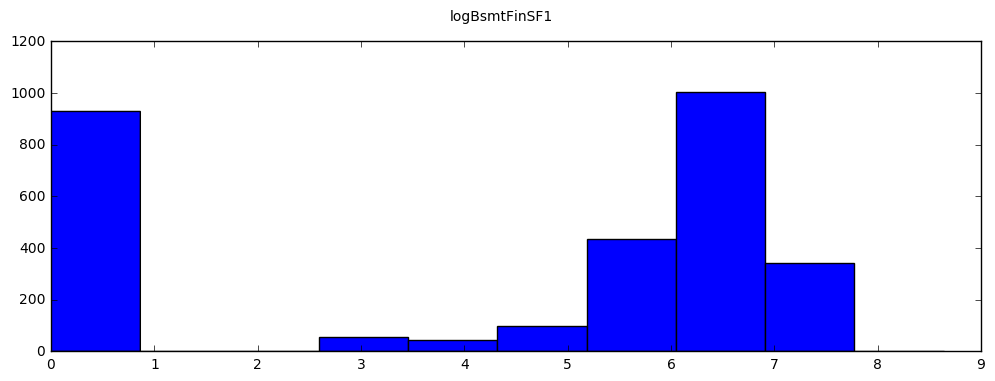

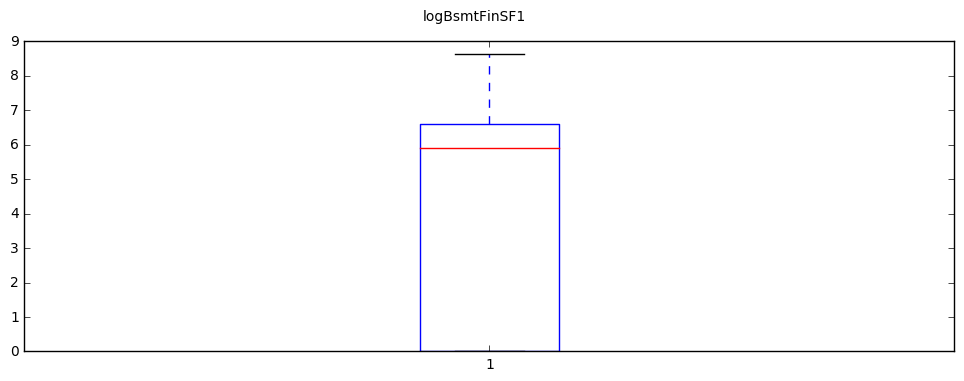

In [30]:
#BsmtFinSF1
mixed_data['logBsmtFinSF1']=mixed_data['BsmtFinSF1'].apply(lambda x: math.log(x+1))

col='logBsmtFinSF1'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logBsmtFinSF1_0']=mixed_data['logBsmtFinSF1']==0 
mixed_data['logBsmtFinSF1_0']=mixed_data['logBsmtFinSF1_0'].astype('int')

In [31]:
#BsmtFinType2
mixed_data['BsmtFinType22']=mixed_data['BsmtFinType2'].copy()
mixed_data.loc[mixed_data['BsmtFinType2']=='GLQ','BsmtFinType2']='6'
mixed_data.loc[mixed_data['BsmtFinType2']=='ALQ','BsmtFinType2']='5'
mixed_data.loc[mixed_data['BsmtFinType2']=='BLQ','BsmtFinType2']='4'
mixed_data.loc[mixed_data['BsmtFinType2']=='Rec','BsmtFinType2']='3'
mixed_data.loc[mixed_data['BsmtFinType2']=='LwQ','BsmtFinType2']='2'
mixed_data.loc[mixed_data['BsmtFinType2']=='Unf','BsmtFinType2']='1'
mixed_data['BsmtFinType2']=mixed_data['BsmtFinType2'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['BsmtFinType2'].unique())
mixed_data['BsmtFinType2_trans']=le.transform(mixed_data['BsmtFinType2'])
mixed_data=mixed_data.drop('BsmtFinType2',1)

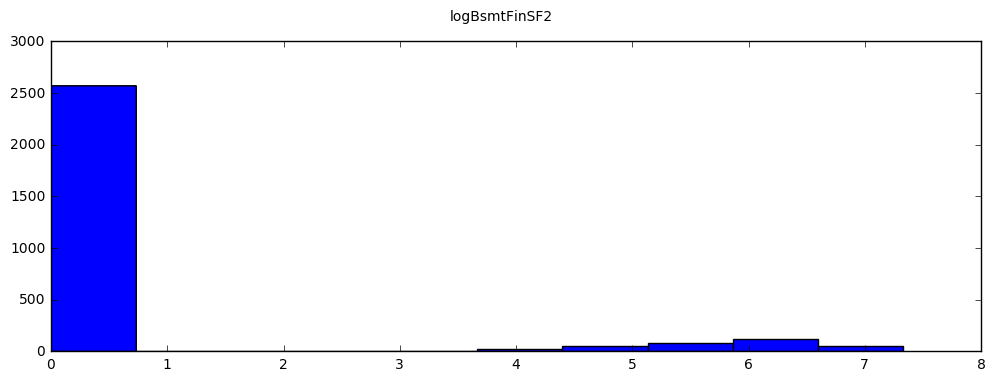

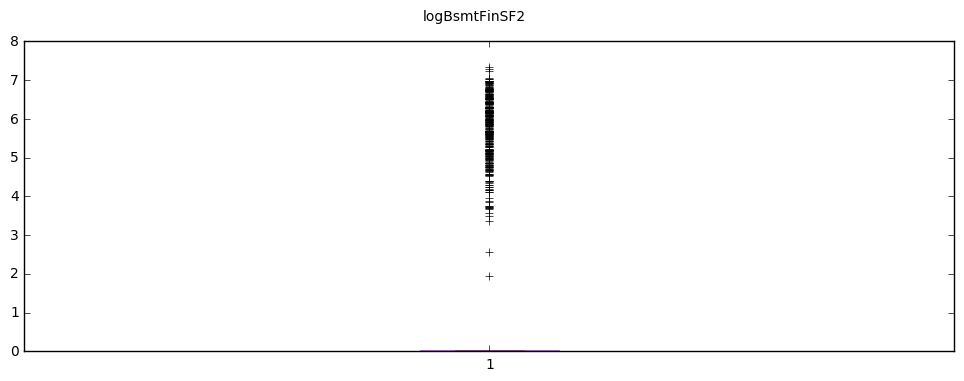

In [32]:
#BsmtUnfSF2
mixed_data['logBsmtFinSF2']=mixed_data['BsmtFinSF2'].apply(lambda x: math.log(x+1))

col='logBsmtFinSF2'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logBsmtFinSF2_0']=mixed_data['logBsmtFinSF2']==0 
mixed_data['logBsmtFinSF2_0']=mixed_data['logBsmtFinSF2_0'].astype('int')

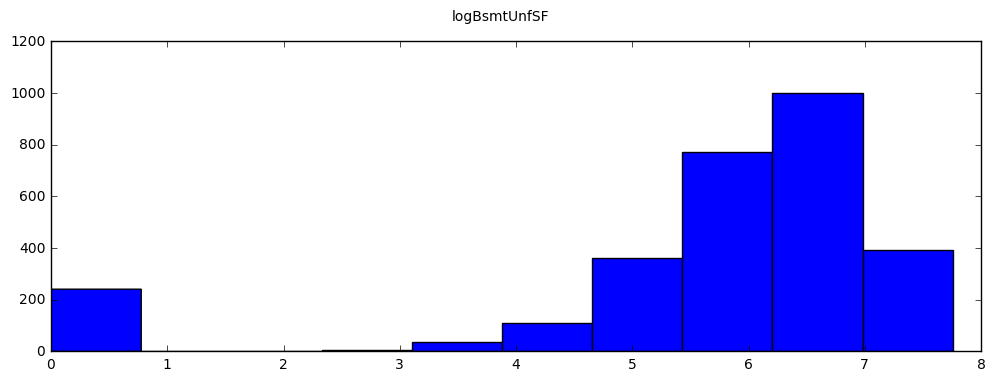

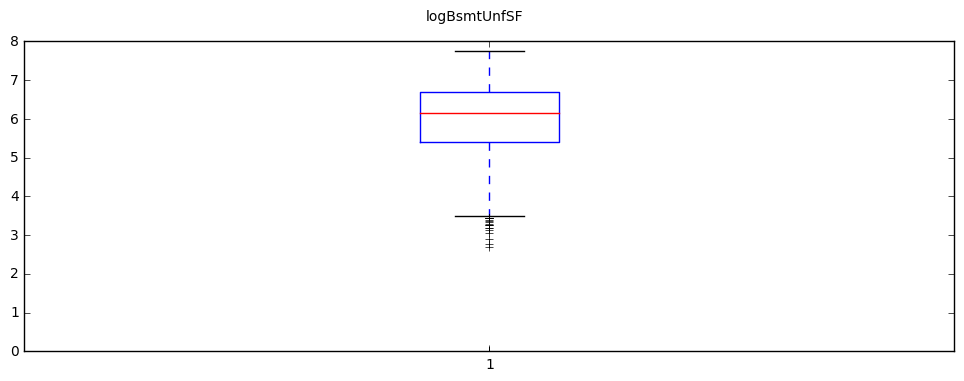

In [33]:
#BsmtUnfSF
mixed_data['logBsmtUnfSF']=mixed_data['BsmtUnfSF'].apply(lambda x: math.log(x+1))

col='logBsmtUnfSF'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logBsmtUnfSF_0']=mixed_data['logBsmtUnfSF']==0 
mixed_data['logBsmtUnfSF_0']=mixed_data['logBsmtUnfSF_0'].astype('int')

In [34]:
#HeatingQC
mixed_data['HeatingQC2']=mixed_data['HeatingQC'].copy()
mixed_data.loc[mixed_data['HeatingQC']=='Ex','HeatingQC']='5'
mixed_data.loc[mixed_data['HeatingQC']=='Gd','HeatingQC']='4'
mixed_data.loc[mixed_data['HeatingQC']=='TA','HeatingQC']='3'
mixed_data.loc[mixed_data['HeatingQC']=='Fa','HeatingQC']='2'
mixed_data.loc[mixed_data['HeatingQC']=='Po','HeatingQC']='1'
mixed_data['HeatingQC']=mixed_data['HeatingQC'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['HeatingQC'].unique())
mixed_data['HeatingQC_trans']=le.transform(mixed_data['HeatingQC'])
mixed_data=mixed_data.drop('HeatingQC',1)

In [35]:
#CentralAir
le = preprocessing.LabelEncoder()
le.fit(mixed_data['CentralAir'].unique())
mixed_data['CentralAir_trans']=le.transform(mixed_data['CentralAir'])
mixed_data=mixed_data.drop('CentralAir',1)

In [36]:
#KitchenQual
mixed_data['KitchenQual2']=mixed_data['KitchenQual'].copy()
mixed_data.loc[mixed_data['KitchenQual']=='Ex','KitchenQual']='5'
mixed_data.loc[mixed_data['KitchenQual']=='Gd','KitchenQual']='4'
mixed_data.loc[mixed_data['KitchenQual']=='TA','KitchenQual']='3'
mixed_data.loc[mixed_data['KitchenQual']=='Fa','KitchenQual']='2'
mixed_data.loc[mixed_data['KitchenQual']=='Po','KitchenQual']='1'
mixed_data['KitchenQual']=mixed_data['KitchenQual'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['KitchenQual'].unique())
mixed_data['KitchenQual_trans']=le.transform(mixed_data['KitchenQual'])
mixed_data=mixed_data.drop('KitchenQual',1)

In [37]:
#Functional
mixed_data['Functional2']=mixed_data['Functional'].copy()
mixed_data.loc[mixed_data['Functional']=='Typ','Functional']='8'
mixed_data.loc[mixed_data['Functional']=='Min1','Functional']='7'
mixed_data.loc[mixed_data['Functional']=='Min2','Functional']='6'
mixed_data.loc[mixed_data['Functional']=='Mod','Functional']='5'
mixed_data.loc[mixed_data['Functional']=='Maj1','Functional']='4'
mixed_data.loc[mixed_data['Functional']=='Maj2','Functional']='3'
mixed_data.loc[mixed_data['Functional']=='Sev','Functional']='2'
mixed_data.loc[mixed_data['Functional']=='Sal','Functional']='1'
mixed_data['Functional']=mixed_data['Functional'].fillna('5')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['Functional'].unique())
mixed_data['Functional_trans']=le.transform(mixed_data['Functional'])
mixed_data=mixed_data.drop('Functional',1)

In [38]:
#FireplaceQu
mixed_data['FireplaceQu2']=mixed_data['FireplaceQu'].copy()
mixed_data.loc[mixed_data['FireplaceQu']=='Ex','FireplaceQu']='5'
mixed_data.loc[mixed_data['FireplaceQu']=='Gd','FireplaceQu']='4'
mixed_data.loc[mixed_data['FireplaceQu']=='TA','FireplaceQu']='3'
mixed_data.loc[mixed_data['FireplaceQu']=='Fa','FireplaceQu']='2'
mixed_data.loc[mixed_data['FireplaceQu']=='Po','FireplaceQu']='1'
mixed_data['FireplaceQu']=mixed_data['FireplaceQu'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['FireplaceQu'].unique())
mixed_data['FireplaceQu_trans']=le.transform(mixed_data['FireplaceQu'])
mixed_data=mixed_data.drop('FireplaceQu',1)

In [39]:
#GarageType
mixed_data['GarageType2']=mixed_data['GarageType'].copy()
mixed_data.loc[mixed_data['GarageType']=='2Types','GarageType']='6'
mixed_data.loc[mixed_data['GarageType']=='Attchd','GarageType']='5'
mixed_data.loc[mixed_data['GarageType']=='Basement','GarageType']='4'
mixed_data.loc[mixed_data['GarageType']=='BuiltIn','GarageType']='3'
mixed_data.loc[mixed_data['GarageType']=='CarPort','GarageType']='2'
mixed_data.loc[mixed_data['GarageType']=='Detchd','GarageType']='1'
mixed_data['GarageType']=mixed_data['GarageType'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['GarageType'].unique())
mixed_data['GarageType_trans']=le.transform(mixed_data['GarageType'])
mixed_data=mixed_data.drop('GarageType',1)

In [40]:
#GarageFinish
mixed_data['GarageFinish2']=mixed_data['GarageFinish'].copy()
mixed_data.loc[mixed_data['GarageFinish']=='Fin','GarageFinish']='3'
mixed_data.loc[mixed_data['GarageFinish']=='RFn','GarageFinish']='2'
mixed_data.loc[mixed_data['GarageFinish']=='Unf','GarageFinish']='1'
mixed_data['GarageFinish']=mixed_data['GarageFinish'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['GarageFinish'].unique())
mixed_data['GarageFinish_trans']=le.transform(mixed_data['GarageFinish'])
mixed_data=mixed_data.drop('GarageFinish',1)

In [41]:
#GarageQual
mixed_data['GarageQual2']=mixed_data['GarageQual'].copy()
mixed_data.loc[mixed_data['GarageQual']=='Ex','GarageQual']='5'
mixed_data.loc[mixed_data['GarageQual']=='Gd','GarageQual']='4'
mixed_data.loc[mixed_data['GarageQual']=='TA','GarageQual']='3'
mixed_data.loc[mixed_data['GarageQual']=='Fa','GarageQual']='2'
mixed_data.loc[mixed_data['GarageQual']=='Po','GarageQual']='1'
mixed_data['GarageQual']=mixed_data['GarageQual'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['GarageQual'].unique())
mixed_data['GarageQual_trans']=le.transform(mixed_data['GarageQual'])
mixed_data=mixed_data.drop('GarageQual',1)

In [42]:
#GarageCond
mixed_data['GarageCond2']=mixed_data['GarageCond'].copy()
mixed_data.loc[mixed_data['GarageCond']=='Ex','GarageCond']='5'
mixed_data.loc[mixed_data['GarageCond']=='Gd','GarageCond']='4'
mixed_data.loc[mixed_data['GarageCond']=='TA','GarageCond']='3'
mixed_data.loc[mixed_data['GarageCond']=='Fa','GarageCond']='2'
mixed_data.loc[mixed_data['GarageCond']=='Po','GarageCond']='1'
mixed_data['GarageCond']=mixed_data['GarageCond'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['GarageCond'].unique())
mixed_data['GarageCond_trans']=le.transform(mixed_data['GarageCond'])
mixed_data=mixed_data.drop('GarageCond',1)

In [43]:
#PavedDrive
mixed_data['PavedDrive2']=mixed_data['PavedDrive'].copy()
mixed_data.loc[mixed_data['PavedDrive']=='TA','PavedDrive']='3'
mixed_data.loc[mixed_data['PavedDrive']=='Fa','PavedDrive']='2'
mixed_data.loc[mixed_data['PavedDrive']=='Po','PavedDrive']='1'
mixed_data['PavedDrive']=mixed_data['PavedDrive'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['PavedDrive'].unique())
mixed_data['PavedDrive_trans']=le.transform(mixed_data['PavedDrive'])
mixed_data=mixed_data.drop('PavedDrive',1)

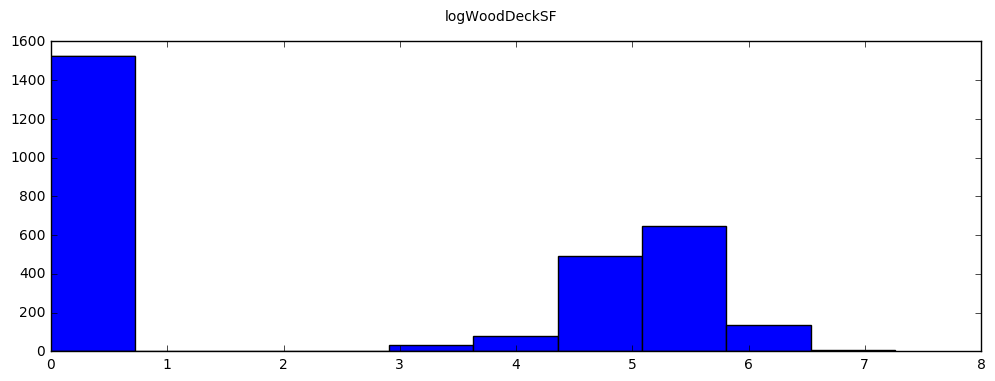

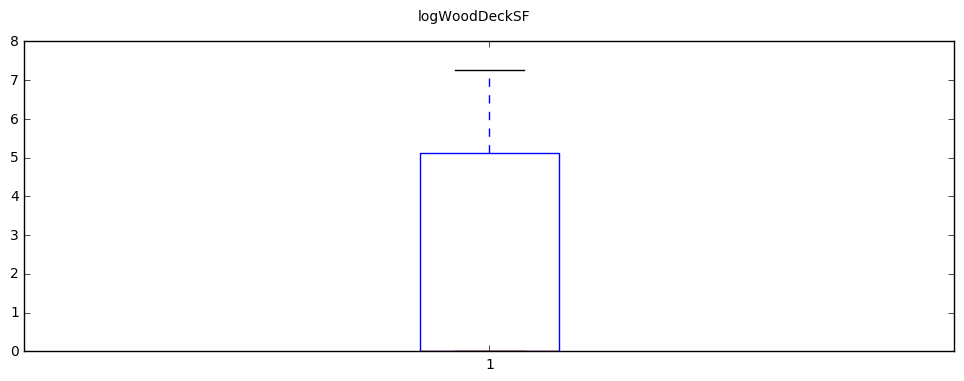

In [44]:
#WoodDeckSF
mixed_data['logWoodDeckSF']=mixed_data['WoodDeckSF'].apply(lambda x: math.log(x+1))

col='logWoodDeckSF'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logWoodDeckSF_0']=mixed_data['logBsmtUnfSF']==0 
mixed_data['logWoodDeckSF_0']=mixed_data['logWoodDeckSF_0'].astype('int')

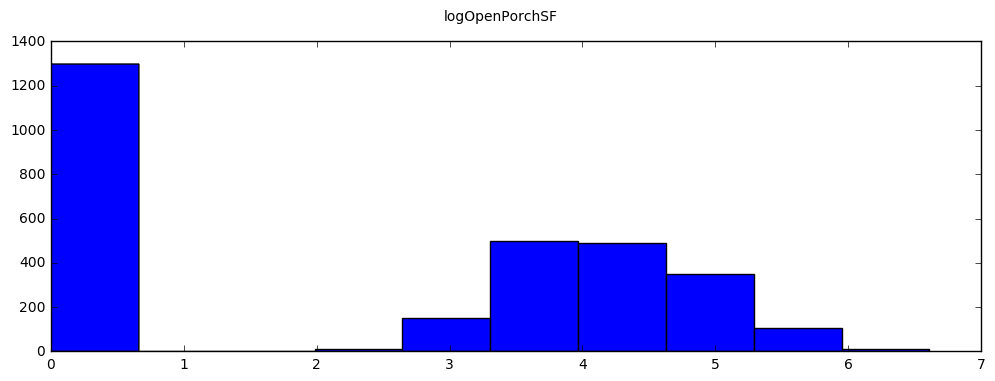

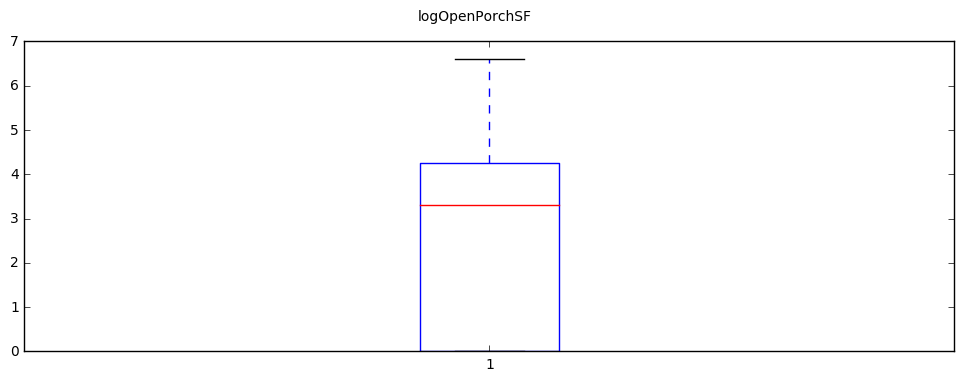

In [45]:
#OpenPorchSF
mixed_data['logOpenPorchSF']=mixed_data['OpenPorchSF'].apply(lambda x: math.log(x+1))

col='logOpenPorchSF'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logOpenPorchSF_0']=mixed_data['logOpenPorchSF']==0 
mixed_data['logOpenPorchSF_0']=mixed_data['logOpenPorchSF_0'].astype('int')

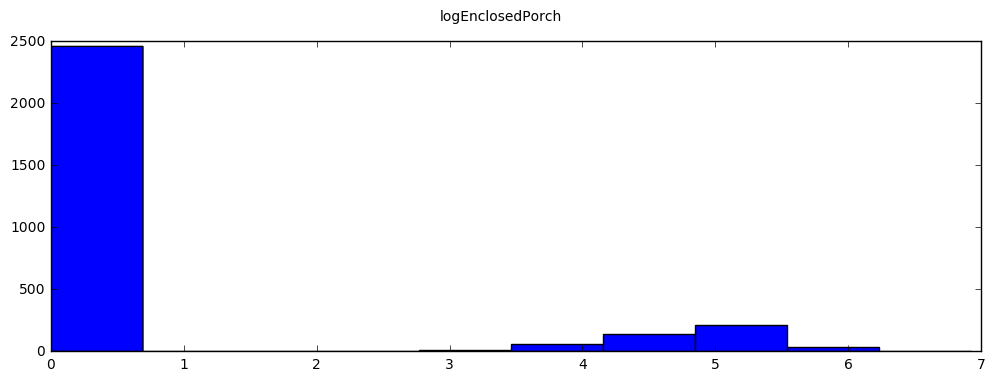

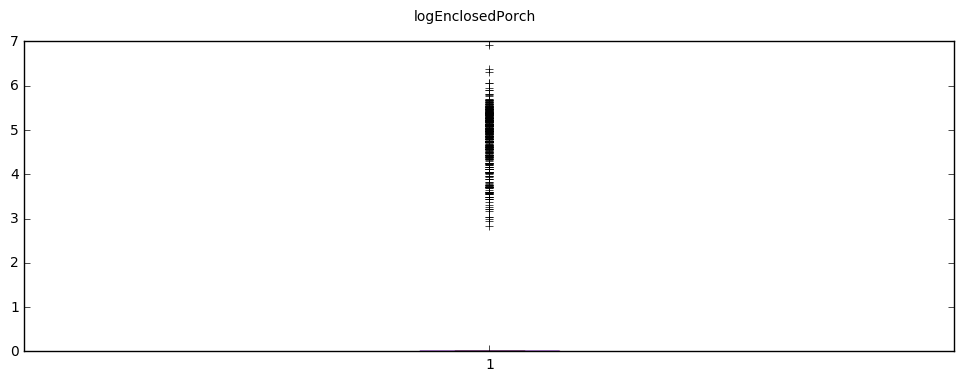

In [46]:
#EnclosedPorch
mixed_data['logEnclosedPorch']=mixed_data['EnclosedPorch'].apply(lambda x: math.log(x+1))

col='logEnclosedPorch'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logEnclosedPorch_0']=mixed_data['logEnclosedPorch']==0 
mixed_data['logEnclosedPorch_0']=mixed_data['logEnclosedPorch_0'].astype('int')

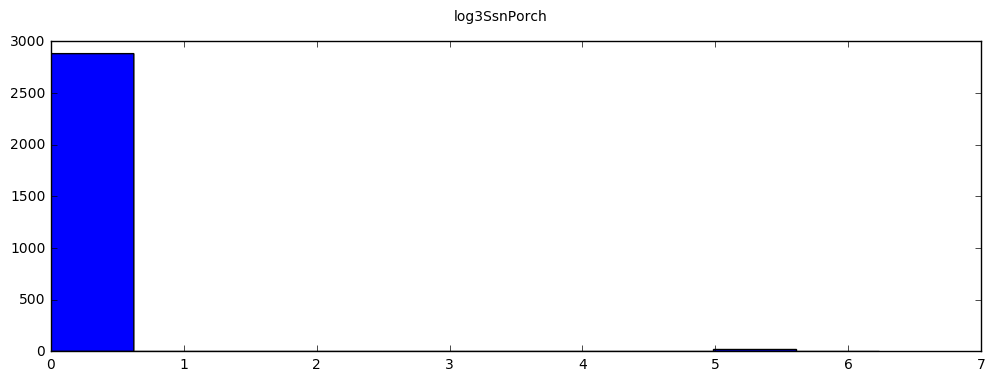

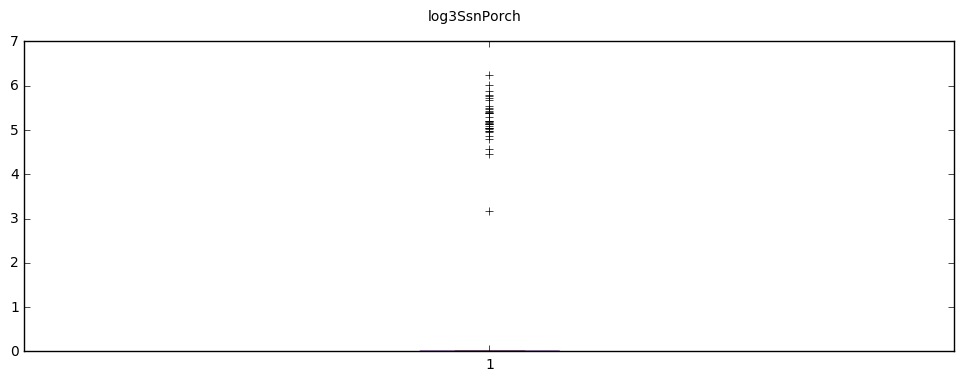

In [47]:
#3SsnPorch
mixed_data['log3SsnPorch']=mixed_data['3SsnPorch'].apply(lambda x: math.log(x+1))

col='log3SsnPorch'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['log3SsnPorch_0']=mixed_data['log3SsnPorch']==0 
mixed_data['log3SsnPorch_0']=mixed_data['log3SsnPorch_0'].astype('int')

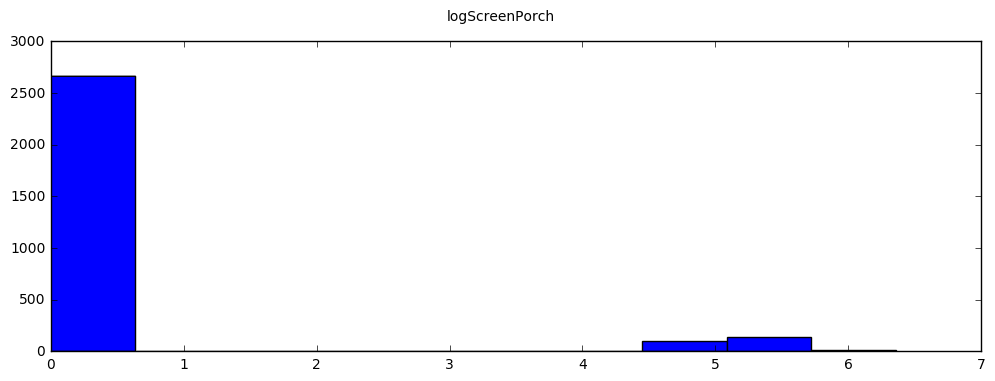

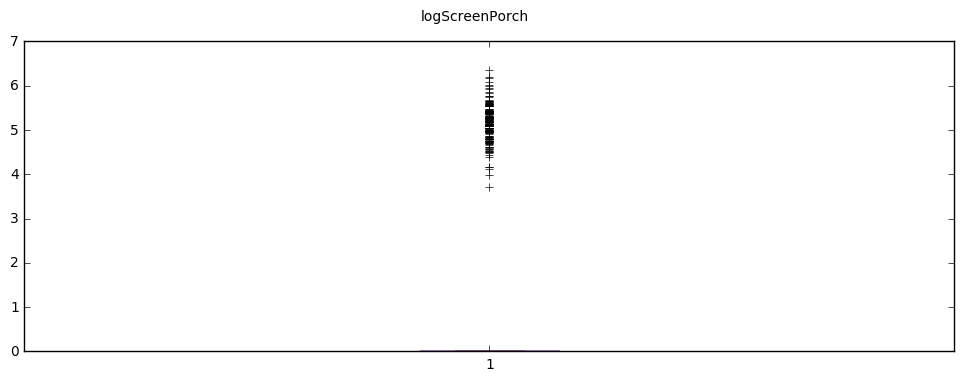

In [48]:
#ScreenPorch
mixed_data['logScreenPorch']=mixed_data['ScreenPorch'].apply(lambda x: math.log(x+1))

col='logScreenPorch'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logScreenPorch_0']=mixed_data['logScreenPorch']==0 
mixed_data['logScreenPorch_0']=mixed_data['logScreenPorch_0'].astype('int')

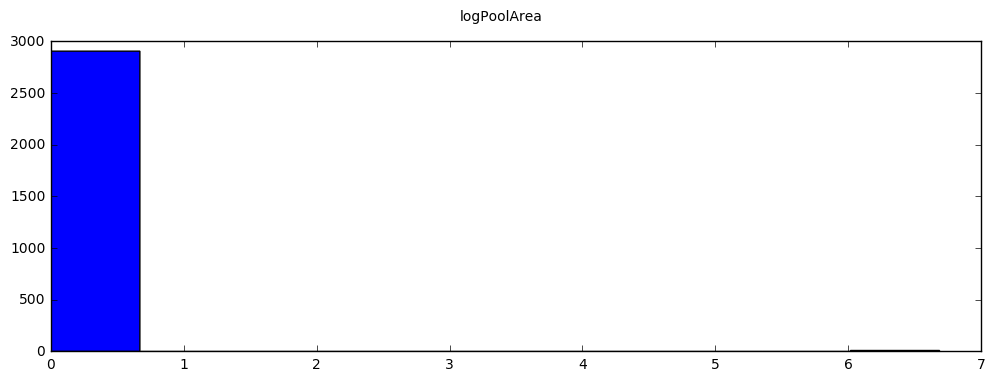

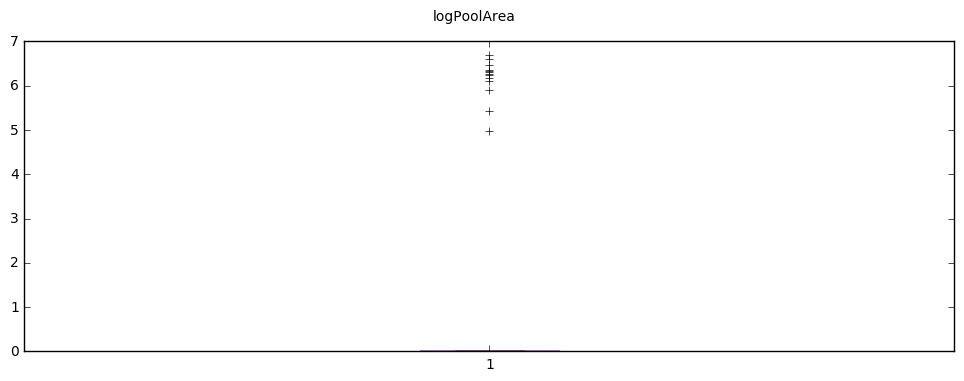

In [49]:
#PoolArea
mixed_data['PoolArea']=mixed_data['PoolArea'].fillna(0)
mixed_data['logPoolArea']=mixed_data['PoolArea'].apply(lambda x: math.log(x+1))

col='logPoolArea'
plt.hist(mixed_data[col].dropna())
plt.suptitle(col)
plt.show()
plt.suptitle(col)
plt.boxplot(mixed_data[col].dropna())
plt.show()

mixed_data['logPoolArea_0']=mixed_data['logPoolArea']==0 
mixed_data['logPoolArea_0']=mixed_data['logPoolArea_0'].astype('int')
mixed_data=mixed_data.drop('logPoolArea_0',1)
mixed_data=mixed_data.drop('logPoolArea',1)
#mixed_data=mixed_data.drop('PoolArea',1)

In [50]:
#PoolQC
mixed_data['PoolQC2']=mixed_data['PoolQC'].copy()
mixed_data.loc[mixed_data['PoolQC']=='Ex','PoolQC']='5'
mixed_data.loc[mixed_data['PoolQC']=='Gd','PoolQC']='4'
mixed_data.loc[mixed_data['PoolQC']=='TA','PoolQC']='3'
mixed_data.loc[mixed_data['PoolQC']=='Fa','PoolQC']='2'
mixed_data.loc[mixed_data['PoolQC']=='Po','PoolQC']='1'
mixed_data['PoolQC']=mixed_data['PoolQC'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['PoolQC'].unique())
mixed_data['PoolQC_trans']=le.transform(mixed_data['PoolQC'])
mixed_data=mixed_data.drop('PoolQC',1)

In [51]:
#Fence
mixed_data['Fence2']=mixed_data['Fence'].copy()
mixed_data.loc[mixed_data['Fence']=='GdPrv','Fence']='2'
mixed_data.loc[mixed_data['Fence']=='MnPrv','Fence']='1'
mixed_data.loc[mixed_data['Fence']=='GdWo','Fence']='2'
mixed_data.loc[mixed_data['Fence']=='MnWw','Fence']='1'
mixed_data['Fence']=mixed_data['Fence'].fillna('0')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['Fence'].unique())
mixed_data['Fence_trans']=le.transform(mixed_data['Fence'])
mixed_data=mixed_data.drop('Fence',1)

In [52]:
#MiscFeature
mixed_data['elevator_mine']=0
mixed_data[mixed_data['MiscFeature']=='Elev']=1

mixed_data['Tennis_mine']=0
mixed_data[mixed_data['MiscFeature']=='TenC']=1

mixed_data['Shed_mine']=0
mixed_data[mixed_data['MiscFeature']=='Shed']=1

mixed_data['Gar2_mine']=0
mixed_data[mixed_data['MiscFeature']=='Gar2']=1

#mixed_data=mixed_data.drop('MiscFeature',1)

In [53]:
#SaleType
mixed_data['SaleType2']=mixed_data['SaleType'].copy()
mixed_data.loc[mixed_data['SaleType']=='Con','SaleType']='5'
mixed_data.loc[mixed_data['SaleType']=='ConLw','SaleType']='4'
mixed_data.loc[mixed_data['SaleType']=='ConLI','SaleType']='3'
mixed_data.loc[mixed_data['SaleType']=='ConLD','SaleType']='2'
mixed_data.loc[mixed_data['SaleType']=='COD','SaleType']='1'
mixed_data.loc[mixed_data['SaleType']=='New','SaleType']='1'
mixed_data.loc[mixed_data['SaleType']=='VWD','SaleType']='1'
mixed_data.loc[mixed_data['SaleType']=='CWD','SaleType']='1'
mixed_data.loc[mixed_data['SaleType']=='WD','SaleType']='1'
mixed_data.loc[mixed_data['SaleType']=='Oth','SaleType']='1'
mixed_data.loc[mixed_data['SaleType']==1,'SaleType']='1'
mixed_data['SaleType']=mixed_data['SaleType'].fillna('1')

le = preprocessing.LabelEncoder()
le.fit(mixed_data['SaleType'].unique())
mixed_data['SaleType_trans']=le.transform(mixed_data['SaleType'])
mixed_data=mixed_data.drop('SaleType',1)

In [54]:
#Redefine data and test_kaggle
data = mixed_data.ix[0:1459].copy()
data['SalePrice']= Y_data.copy()
test_kaggle=mixed_data.ix[1460:].copy()

In [55]:
print(data.shape)
print(test_kaggle.shape)

(1460, 129)
(1459, 128)


## Cleaning data.

### Removing NaNs.

 We have to take a decision about what to do whit the missing values, and if we need to transform the data. First we can see variables with a really big number of NAs, lets remove them, and also the Id column.

In [56]:
for col in data.columns:
    if sum(data[col].isnull())!=0:
        print(col,' have ',sum(data[col].isnull()),' NaNs')

LotFrontage  have  244  NaNs
MasVnrType  have  8  NaNs
MasVnrArea  have  8  NaNs
Electrical  have  1  NaNs
GarageYrBlt  have  79  NaNs
MiscFeature  have  1406  NaNs
logMasVnrArea  have  8  NaNs
BsmtQual2  have  35  NaNs
BsmtCond2  have  35  NaNs
BsmtExposure2  have  36  NaNs
BsmtFinType12  have  35  NaNs
BsmtFinType22  have  36  NaNs
FireplaceQu2  have  662  NaNs
GarageType2  have  79  NaNs
GarageFinish2  have  79  NaNs
GarageQual2  have  79  NaNs
GarageCond2  have  79  NaNs
PoolQC2  have  1402  NaNs
Fence2  have  1151  NaNs


In [57]:
for col in test_kaggle.columns:
    if sum(test_kaggle[col].isnull())!=0:
        print(col,' have ',sum(test_kaggle[col].isnull()),' NaNs')

MSZoning  have  4  NaNs
LotFrontage  have  218  NaNs
Utilities  have  1  NaNs
Exterior1st  have  1  NaNs
Exterior2nd  have  1  NaNs
MasVnrType  have  16  NaNs
MasVnrArea  have  15  NaNs
BsmtFinSF1  have  1  NaNs
BsmtFinSF2  have  1  NaNs
BsmtUnfSF  have  1  NaNs
TotalBsmtSF  have  1  NaNs
BsmtFullBath  have  2  NaNs
BsmtHalfBath  have  2  NaNs
GarageYrBlt  have  73  NaNs
GarageCars  have  1  NaNs
GarageArea  have  1  NaNs
MiscFeature  have  1408  NaNs
logMasVnrArea  have  15  NaNs
BsmtQual2  have  42  NaNs
BsmtCond2  have  43  NaNs
BsmtExposure2  have  42  NaNs
BsmtFinType12  have  40  NaNs
logBsmtFinSF1  have  1  NaNs
BsmtFinType22  have  40  NaNs
logBsmtFinSF2  have  1  NaNs
logBsmtUnfSF  have  1  NaNs
KitchenQual2  have  1  NaNs
Functional2  have  2  NaNs
FireplaceQu2  have  700  NaNs
GarageType2  have  72  NaNs
GarageFinish2  have  73  NaNs
GarageQual2  have  73  NaNs
GarageCond2  have  73  NaNs
PoolQC2  have  1407  NaNs
Fence2  have  1137  NaNs
SaleType2  have  1  NaNs


In [58]:
data=data.drop('Id',1)
data=data.drop('FireplaceQu2',1)
data=data.drop('PoolQC2',1)
data=data.drop('Fence2',1)
data=data.drop('MiscFeature',1)

test_kaggle=test_kaggle.drop('Id',1)
test_kaggle=test_kaggle.drop('FireplaceQu2',1)
test_kaggle=test_kaggle.drop('PoolQC2',1)
test_kaggle=test_kaggle.drop('Fence2',1)
test_kaggle=test_kaggle.drop('MiscFeature',1)

Now we could drop the rest of NaNs, or replace them by the mean.

In [59]:
data1=data.dropna()
for col in data1.columns:
    if sum(data1[col].isnull())!=0:
        print(col,' have ',sum(data1[col].isnull()),' NaNs')
        
print(data1.shape)
print(data.shape)

(1112, 124)
(1460, 124)


In [61]:
data2=data.copy()
test_kaggle2=test_kaggle.copy()
for col in test_kaggle2.columns:
    if 'object'==data[col].dtype:
        aux=data2[col].value_counts().index[0]
        data2[col]=data2[col].fillna(aux) 
        test_kaggle2[col]=test_kaggle2[col].fillna(aux) 
    else:
        aux=data2[col].mean()
        data2[col]=data2[col].fillna(aux)
        test_kaggle2[col]=test_kaggle2[col].fillna(aux)

#Checking that we don't have NaNs
for col in test_kaggle2.columns:
    if sum(test_kaggle2[col].isnull())!=0:
        print(col,' have ',sum(test_kaggle2[col].isnull()),' NaNs')

### Creating dummi variables.

In [62]:
X_data = data2.drop('SalePrice',1)
Y_data= data2['SalePrice']
print(data2.shape)
print(X_data.shape)
print(test_kaggle2.shape)
test_kaggle2.index=test_kaggle2.index+1460#do onli one time
mixed_data=pd.concat([X_data,test_kaggle2])
print(mixed_data.shape)
#print((mixed_data['MSSubClass'][0:1460]==X_data['MSSubClass']).head())


(1460, 124)
(1460, 123)
(1459, 123)
(2919, 123)


In [63]:
mixed_data1=mixed_data.copy()
for col in mixed_data1.columns:
    if mixed_data1[col].dtype == 'object':
        aux=pd.get_dummies(mixed_data1[col])
        names_aux=[]
        for i,name in enumerate(aux.columns):
            names_aux= names_aux+[col+'_'+str(name)]
        aux.columns=names_aux
        mixed_data1=mixed_data1.join(aux)
        mixed_data1=mixed_data1.drop(col,1)
        #mixed_data1=mixed_data1.join(aux)

In [64]:
mixed_data1.head()

MSSubClass  LotFrontage  LotArea  HouseStyle  OverallQual  OverallCond  \
0          60         65.0     8450           3            7            5   
1          20         80.0     9600           0            6            8   
2          60         68.0    11250           3            7            5   
3          70         60.0     9550           3            7            5   
4          60         84.0    14260           3            8            5   

   YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1      ...       SaleType2_1  \
0       2003          2003       196.0       706.0      ...               0.0   
1       1976          1976         0.0       978.0      ...               0.0   
2       2001          2002       162.0       486.0      ...               0.0   
3       1915          1970         0.0       216.0      ...               0.0   
4       2000          2000       350.0       655.0      ...               0.0   

   SaleType2_COD  SaleType2_CWD  SaleType2_Con  SaleType2_ConLD  \
0            0.0            0.0            0.0              0.0   
1            0.0            0.0            0.0              0.0   
2            0.0            0.0            0.0              0.0   
3            0.0            0.0            0.0              0.0   
4            0.0            0.0            0.0              0.0   

   SaleType2_ConLI  SaleType2_ConLw  SaleType2_New  SaleType2_Oth  \
0              0.0              0.0            0.0            0.0   
1              0.0              0.0            0.0            0.0   
2              0.0              0.0            0.0            0.0   
3              0.0              0.0            0.0            0.0   
4              0.0              0.0            0.0            0.0   

   SaleType2_WD  
0           1.0  
1           1.0  
2           1.0  
3           1.0  
4           1.0  

[5 rows x 324 columns]

## Feature selecction.

In [65]:
data_pre = mixed_data1.ix[0:1459].copy()
data_pre['SalePrice']= Y_data.copy()
test_kaggle_pre=mixed_data1.ix[1460:].copy()

In [66]:
clf = ExtraTreesClassifier()
clf = clf.fit(data_pre.drop('SalePrice',1),data_pre['SalePrice'])
importances=pd.concat([pd.DataFrame(data_pre.drop('SalePrice',1).columns,columns=['col']),pd.DataFrame(clf.feature_importances_,columns=['imp'])],1)

In [67]:
importances.head()

col       imp
0   MSSubClass  0.009982
1  LotFrontage  0.015855
2      LotArea  0.017280
3   HouseStyle  0.008867
4  OverallQual  0.013302

In [68]:
importances.sort(['imp']).head()

C:\Users\AlvaroSanchez91\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  if __name__ == '__main__':


col  imp
161  Exterior2nd_CBlock  0.0
129   RoofStyle_Mansard  0.0
247        BsmtCond2_Po  0.0
124         RoofStyle_1  0.0
118          BldgType_1  0.0

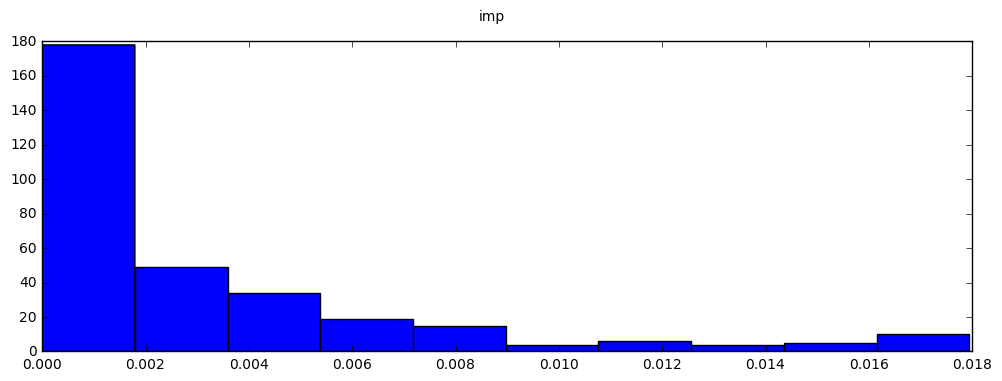

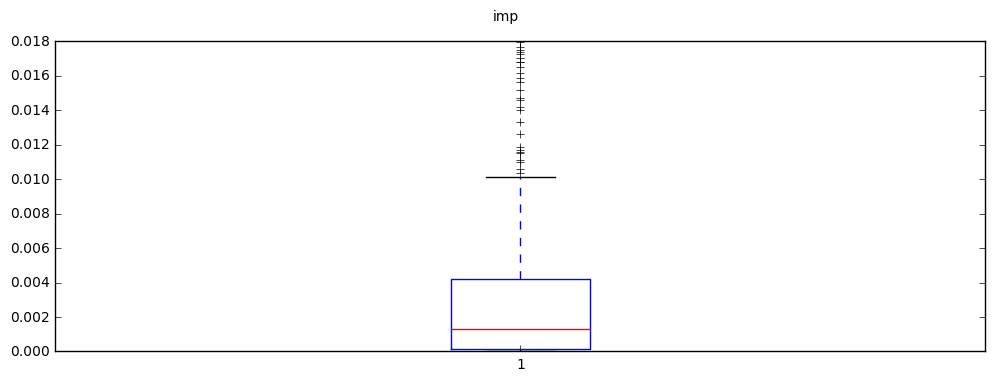

In [69]:
#We could use these histogram to make us a idea of what to do.
plt.hist(importances['imp'])
plt.suptitle('imp')
plt.show()
plt.suptitle('imp')
plt.boxplot(importances['imp'])
plt.show()

In [70]:
predictors=list(importances[importances['imp']>=0.002]['col'])

In [71]:
len(predictors)

140

## First model.

### Test and train split.
Before creating the model to predict, we can create models using only a part of the data (train), and see how it works with the rest of the data (test). Then, we can decide wich models have a good performance, and train it with all the data.

In [72]:
data_pre = mixed_data1.ix[0:1459].copy()
data_pre['SalePrice']= Y_data.copy()
test_kaggle_pre=mixed_data1.ix[1460:].copy()

In [73]:
print(data.shape)
print(data_pre.shape)
print(test_kaggle.shape)
print(test_kaggle_pre.shape)

(1460, 124)
(1460, 325)
(1459, 123)
(1459, 324)


In [74]:
train, test = train_test_split(data_pre, test_size = 0.3)

In [75]:
print(train.shape)
print(test.shape)
print(data.shape)

(1022, 325)
(438, 325)
(1460, 124)


Now we have our data divided.

In [76]:

X_train = train[predictors]
Y_train= train['SalePrice'].copy()
T_train_xgb = xgb.DMatrix(X_train, Y_train)


In [77]:
len(list(X_train.columns))
#len(list(test_kaggle21.columns))

140

In [78]:
params = {"objective": "reg:linear"}
gbm = xgb.train(dtrain=T_train_xgb,params=params)
#Y_pred = gbm.predict(xgb.DMatrix(test.drop('SalePrice',1)))
Y_pred = gbm.predict(xgb.DMatrix(test[predictors]))

In [79]:
from sklearn.metrics import r2_score
r2_score(test['SalePrice'], Y_pred, sample_weight=None, multioutput=None)

0.70904239217377341

Not so bad to be the first attemp. Lets see wath happend if we make the submission for kaggle.

In [177]:
X_train = data_pre[predictors].copy()
Y_train= data_pre['SalePrice'].copy()
T_train_xgb = xgb.DMatrix(X_train, Y_train)
params = {"objective": "reg:linear"}
gbm = xgb.train(dtrain=T_train_xgb,params=params)
Y_pred = gbm.predict(xgb.DMatrix(test_kaggle_pre[predictors]))

In [179]:
print(Y_pred.shape)
print(test_kaggle_pre[predictors].shape)

(1459,)
(1459, 65)


In [109]:
example=pd.read_csv("D:\\Ciencia de Datos\\kaggle\\House Prices. Advanced regression techniques\\sample_submission.csv")

In [110]:
example.head()
example.columns

Index(['Id', 'SalePrice'], dtype='object')

In [180]:
submission=pd.concat([pd.DataFrame(Id_test_kaggle,columns=['Id']),pd.DataFrame(Y_pred,columns=['SalePrice'] )], axis=1)
#submission.columns=['Id', 'SalePrice']

In [181]:
submission.head()

Id      SalePrice
0  1461  127018.343750
1  1462  147626.312500
2  1463  170391.953125
3  1464  192027.515625
4  1465  182937.515625

In [182]:
submission.to_csv('D:\\Ciencia de Datos\\kaggle\\House Prices. Advanced regression techniques\\submission5.csv', index=False)

## Second model.
We should make a parameter optimization to improve the results. We will use cross validation instead of train test, becouse our data is'nt so big.

In [80]:
train = data_pre.copy()
target = 'SalePrice'
#IDcol = 'ID'

### Tuning n_estimators.

In [81]:
xgb1 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=1,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 scale_pos_weight=1,
 seed=27)

alg=xgb1
dtrain=train
cv_folds=5
early_stopping_rounds=50
    
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
cvresult = xgb.cv(xgb_param, xgtrain,
    num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics='rmse', early_stopping_rounds=early_stopping_rounds)#, show_progress=False)

print(cvresult.shape[0])
cvresult.tail()

274


test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
269    29419.023438    4483.086015     10239.748242      617.473083
270    29415.224609    4487.314142     10236.212305      618.409367
271    29414.593359    4481.949208     10232.811328      618.295571
272    29413.326563    4480.911288     10227.322070      619.183331
273    29409.946094    4478.395014     10223.358985      617.742440

Each tree is built depending on the previous one, if we take a big number we could overfit. With the previous code we see that we should take 274 trees.

### Tuning max_depth and min_child_weight.

Lets use a grid search (loaded from sklearn) to look for good parameters.

In [82]:
param_test1 = {
 'max_depth':list(range(3,10,2)),
 'min_child_weight':list(range(1,6,2))
}
gsearch1 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=274, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear',  scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='neg_mean_squared_error',iid=False, cv=5)
gsearch1.fit(train[predictors],train[target])
gsearch1.best_params_, gsearch1.best_score_#max_depth=5,min_child_weight=3

({'max_depth': 5, 'min_child_weight': 3}, -851665265.533544)

In [84]:
param_test2 = {
 'max_depth':list(range(5,21,5)),
 'min_child_weight':list(range(3,15,2))
}
gsearch2 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear',  scale_pos_weight=1, seed=27), 
 param_grid = param_test2, scoring='neg_mean_squared_error',iid=False, cv=5)
gsearch2.fit(train[predictors],train[target])
gsearch2.best_params_, gsearch2.best_score_#max_depth=5,min_child_weight=3

({'max_depth': 5, 'min_child_weight': 3}, -851548169.3968973)

In [85]:
param_test3 = {
 'max_depth':[4,5,6],
 'min_child_weight':[2,3,4]
}
gsearch3 = GridSearchCV(estimator = XGBRegressor( learning_rate =0.1, n_estimators=200, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'reg:linear',  scale_pos_weight=1, seed=27), 
 param_grid = param_test3, scoring='neg_mean_squared_error',iid=False, cv=5)
gsearch3.fit(train[predictors],train[target])
gsearch3.best_params_, gsearch3.best_score_#max_depth=5,min_child_weight=3

({'max_depth': 5, 'min_child_weight': 3}, -851548169.3968973)

Now lets go back, and decided which is the best n_estimators with max_depth=5,min_child_weight=3.

In [86]:
xgb2 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=3,
 gamma=0,
 subsample=0.8,
 colsample_bytree=0.8,
 objective= 'reg:linear',
 scale_pos_weight=1,
 seed=27)

alg=xgb2
dtrain=train
cv_folds=5
early_stopping_rounds=50
    
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
cvresult = xgb.cv(xgb_param, xgtrain,
    num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics='rmse', early_stopping_rounds=early_stopping_rounds)#, show_progress=False)
print(cvresult.shape[0])
cvresult.tail()

328


test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
323    28037.783203    4409.372594     10127.812109      624.734127
324    28031.410937    4410.792682     10123.795117      625.649981
325    28025.330859    4417.706839     10120.564063      625.143988
326    28022.954297    4418.080394     10117.112109      624.559338
327    28016.396875    4415.245891     10114.182422      625.638117

So we will take max_depth=5, min_child_weight=3,n_estimators=328.

### Tuning gamma.

In [87]:
param_test4={
    'gamma':[i/10 for i in range (5)]
             }
gsearch4=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1,n_estimators=328,max_depth=5,
            min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,
            objective='reg:linear',scale_pos_weight=1,seed=27),
            param_grid=param_test4,scoring='neg_mean_squared_error',iid=False,cv=5)

gsearch4.fit(train[predictors],train[target])
gsearch4.best_params_,gsearch4.best_score_#gamma=0

({'gamma': 0.0}, -852745808.9452437)

In [88]:
param_test5={
    'gamma':[i/100 for i in range (10)]
             }
gsearch5=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1,n_estimators=328,max_depth=5,
            min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,
            objective='reg:linear',scale_pos_weight=1,seed=27),
            param_grid=param_test5,scoring='neg_mean_squared_error',iid=False,cv=5)

gsearch5.fit(train[predictors],train[target])
gsearch5.best_params_,gsearch5.best_score_#gamma=0

({'gamma': 0.0}, -852745808.9452437)

We can't improve tuning this parameter.

### TUNING colsample and subsample_bytree.

In [89]:
param_test6={
             'subsample':[i/10 for i in range(6,11)],
             'colsample_bytree':[i/10 for i in range(6,11)]
             }
gsearch6=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1,n_estimators=328,max_depth=5,
            min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,
            objective='reg:linear',scale_pos_weight=1,seed=27),
            param_grid=param_test6,scoring='neg_mean_squared_error',iid=False,cv=5)

gsearch6.fit(train[predictors],train[target])
gsearch6.best_params_,gsearch6.best_score_#we obtain 'colsample_bytree': 0.6, 'subsample': 1


({'colsample_bytree': 0.6, 'subsample': 0.9}, -802202531.2621348)

In [90]:
param_test7={
             'colsample_bytree':[i/100 for i in range(55,70,5)],
             'subsample':[i/100 for i in range(75,100,5)]
             }
gsearch7=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1,n_estimators=328,max_depth=5,
            min_child_weight=3,gamma=0,subsample=0.8,colsample_bytree=0.8,
            objective='reg:linear',scale_pos_weight=1,seed=27),
            param_grid=param_test7,scoring='neg_mean_squared_error',iid=False,cv=5)

gsearch7.fit(train[predictors],train[target])
gsearch7.best_params_,gsearch7.best_score_#we obtain 'colsample_bytree': 0.6, 'subsample': 1

({'colsample_bytree': 0.6, 'subsample': 0.95}, -762331477.3340123)

Let's see n_estimators with 'colsample_bytree'= 0.6, 'subsample'= 1.

In [91]:
xgb3 = XGBRegressor(
 learning_rate =0.1,
 n_estimators=1000,
 max_depth=5,
 min_child_weight=3,
 gamma=0,
 subsample=0.95,
 colsample_bytree=0.6,
 objective= 'reg:linear',
 scale_pos_weight=1,
 seed=27)

alg=xgb3
dtrain=train
cv_folds=5
early_stopping_rounds=50
    
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
cvresult = xgb.cv(xgb_param, xgtrain,
    num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics='rmse', early_stopping_rounds=early_stopping_rounds)#, show_progress=False)
print(cvresult.shape[0])
cvresult.tail()

205


test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
200    28059.819922    3465.989117     10714.414453      565.816678
201    28059.787109    3469.106360     10703.687696      561.670367
202    28052.939844    3471.826532     10698.098047      561.920193
203    28051.954297    3467.068282     10691.343359      563.170674
204    28050.332813    3465.937180     10683.013281      561.135303

We obtain n_estimators=205.

### TUNING reg_alpha.

In [92]:
param_test8={
             'reg_alpha':[1e-5,1e-2,0.1,100]
             }
gsearch8=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1,n_estimators=205,max_depth=5,
            min_child_weight=3,gamma=0,subsample=0.95,colsample_bytree=0.6,
            objective='reg:linear',scale_pos_weight=1,seed=27),
            param_grid=param_test8,scoring='neg_mean_squared_error',iid=False,cv=5)

gsearch8.fit(train[predictors],train[target])
gsearch8.best_params_,gsearch8.best_score_#we obtain   reg_alpha = 0.1

({'reg_alpha': 0.1}, -760055544.6289631)

In [93]:
param_test9={
             'reg_alpha':[0.05,0.075,0.1,0.125,0.15]
             }
gsearch9=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1,n_estimators=205,max_depth=5,
            min_child_weight=3,gamma=0,subsample=0.95,colsample_bytree=0.6,
            objective='reg:linear',scale_pos_weight=1,seed=27),
            param_grid=param_test9,scoring='neg_mean_squared_error',iid=False,cv=5)

gsearch9.fit(train[predictors],train[target])
gsearch9.best_params_,gsearch9.best_score_#we obtain   reg_alpha = 0.075

({'reg_alpha': 0.075}, -760055470.6588025)

In [95]:
param_test10={
             'reg_alpha':[i/1000 for i in range(60,85) ]
             }
gsearch10=GridSearchCV(estimator = XGBRegressor(learning_rate=0.1,n_estimators=205,max_depth=5,
            min_child_weight=3,gamma=0,subsample=1,colsample_bytree=0.6,
            objective='reg:linear',scale_pos_weight=1,seed=27),
            param_grid=param_test10,scoring='neg_mean_squared_error',iid=False,cv=5)

gsearch10.fit(train[predictors],train[target])
gsearch10.best_params_,gsearch10.best_score_#we obtain   reg_alpha = 0.077

({'reg_alpha': 0.077}, -851347373.8119568)

Almost whithout changes.

### Reducing learning rate.

In [96]:
xgb4 = XGBRegressor(
 learning_rate =0.01,
 n_estimators=5000,
 max_depth=5,
 min_child_weight=3,
 gamma=0,
 subsample=0.95,
 colsample_bytree=0.6,
 objective= 'reg:linear',
 scale_pos_weight=1,
 reg_alpha = 0.077,
 seed=27)

alg=xgb4
dtrain=train
cv_folds=5
early_stopping_rounds=50
    
xgb_param = alg.get_xgb_params()
xgtrain = xgb.DMatrix(dtrain[predictors].values, label=dtrain[target].values)
cvresult = xgb.cv(xgb_param, xgtrain,
    num_boost_round=alg.get_params()['n_estimators'], nfold=cv_folds,
    metrics='rmse', early_stopping_rounds=early_stopping_rounds)#, show_progress=False)
print(cvresult.shape[0])
cvresult.tail()

1856


test-rmse-mean  test-rmse-std  train-rmse-mean  train-rmse-std
1851    27325.465234    3629.536228     10836.313672      563.983279
1852    27325.519531    3628.770611     10834.753906      563.989743
1853    27326.003906    3628.657834     10833.576758      564.100581
1854    27325.776172    3628.601813     10832.201953      564.079057
1855    27325.137109    3628.125215     10830.781445      564.454389

In [97]:
xgb_optimized = XGBRegressor(
 learning_rate =0.01,
 n_estimators=1856,
 max_depth=5,
 min_child_weight=3,
 gamma=0,
 subsample=0.95,
 colsample_bytree=0.6,
 objective= 'reg:linear',
 scale_pos_weight=1,
 reg_alpha = 0.077,
 seed=27)
xgb_optimized.fit(train[predictors], train[target],eval_metric='rmse')

XGBRegressor(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.6,
       gamma=0, learning_rate=0.01, max_delta_step=0, max_depth=5,
       min_child_weight=3, missing=None, n_estimators=1856, nthread=-1,
       objective='reg:linear', reg_alpha=0.077, reg_lambda=1,
       scale_pos_weight=1, seed=27, silent=True, subsample=0.95)

In [99]:
test_kaggle_pre[predictors].shape

(1459, 140)

In [100]:
prediccions_optimized=xgb_optimized.predict(test_kaggle_pre[predictors])

In [101]:
Y_pred_opt=pd.DataFrame(prediccions_optimized)

In [102]:
Y_pred_opt.head()

0
0  129616.382812
1  153914.578125
2  187483.906250
3  195480.921875
4  189856.265625

In [103]:
submission_opt=pd.concat([pd.DataFrame(Id_test_kaggle,columns=['Id']),pd.DataFrame(prediccions_optimized,columns=['SalePrice'] )], axis=1)

In [104]:
submission_opt.head()

Id      SalePrice
0  1461  129616.382812
1  1462  153914.578125
2  1463  187483.906250
3  1464  195480.921875
4  1465  189856.265625

In [105]:
submission_opt.to_csv('D:\\Ciencia de Datos\\kaggle\\House Prices. Advanced regression techniques\\submission6.csv', index=False)